# **Проект: Анализ рынка продажи автомобилей (Казахстан), 2019 г. (Часть 4)**

## **0. Импорт библиотек и загрузка очищенного файла с данными**

In [1]:
# Загрузим библиотеки
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import plotly.express as px
from plotly import graph_objects as go
#import warnings
#warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format ='{:,.2f}'.format
# pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Создадим датафрейм df на основе файла autokz2019.csv
df = pd.read_csv('https://github.com/VeraNovich/Yandex.Praktikum_WorkShop/raw/main/06_Auto_Kazakhstan/autokz2019_cleared.csv')
df.head(2)

,год_месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двигателя(л),коробка_передач,тип_привода,регион,количество,цена(usd),общая_стоимость_заказа(usd),область,сегментация_2013,класс_2013,производитель,объём_двигателя_класс,категория_заказа_количество,категория_заказа_цена
0,2019-05,Mercur Auto,Audi,A3,2018,DEU,бензин,1.40,АКПП,FWD,Алматы,1,"28,115.00","28,115.00",г.Алматы,Легковые автомобили,C класс,EU,малый,1 автомобиль,от 25.000 до 35.000 USD
1,2019-08,Mercur Auto,Audi,A3,2018,DEU,бензин,1.40,АКПП,FWD,Алматы,1,"32,246.99","32,246.99",г.Алматы,Легковые автомобили,C класс,EU,малый,1 автомобиль,от 25.000 до 35.000 USD


In [3]:
# Изменим тип данных столбца 'год_месяц'
df['год_месяц'] = pd.to_datetime(df['год_месяц']).dt.to_period("M")

In [4]:
# Выведем общую информацию об исходном файле с помощью метода .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39954 entries, 0 to 39953
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype    
---  ------                       --------------  -----    
 0   год_месяц                    39954 non-null  period[M]
 1   компания                     39954 non-null  object   
 2   бренд                        39954 non-null  object   
 3   модель                       39954 non-null  object   
 4   год_выпуска                  39954 non-null  int64    
 5   страна_производитель         39954 non-null  object   
 6   вид_топлива                  39954 non-null  object   
 7   объём_двигателя(л)           39954 non-null  float64  
 8   коробка_передач              39954 non-null  object   
 9   тип_привода                  39954 non-null  object   
 10  регион                       39954 non-null  object   
 11  количество                   39954 non-null  int64    
 12  цена(usd)                    39954 non-null  f

## **5. Анализ положения автоцентра Меркур Авто на автомобильном рынке Казахстана**

### **5.0. Техническое задание раздела**

**План анализа:**

- анализ выручки: общая, по маркам, средняя, ежемесячная, ежемесячная по маркам;
- анализ продаж по регионам: общие, по маркам;
- конкурентный анализ;
- BCG анализ (анализ продаж по моделям).

### **5.1. Создадим датафрейм df_mercur_auto**

In [5]:
# Для целей данного раздела проекта создадим датафрейм df_mercur_auto
df_mercur_auto = df.copy(deep=True)
df_mercur_auto = df_mercur_auto[df_mercur_auto['компания'] =='Mercur Auto']
df_mercur_auto['компания'].unique()

array(['Mercur Auto'], dtype=object)

In [6]:
# Выведем общую информацию по датафрейму df_mercur_auto с помощью метода .info()
df_mercur_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 39793
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype    
---  ------                       --------------  -----    
 0   год_месяц                    643 non-null    period[M]
 1   компания                     643 non-null    object   
 2   бренд                        643 non-null    object   
 3   модель                       643 non-null    object   
 4   год_выпуска                  643 non-null    int64    
 5   страна_производитель         643 non-null    object   
 6   вид_топлива                  643 non-null    object   
 7   объём_двигателя(л)           643 non-null    float64  
 8   коробка_передач              643 non-null    object   
 9   тип_привода                  643 non-null    object   
 10  регион                       643 non-null    object   
 11  количество                   643 non-null    int64    
 12  цена(usd)                    643 non-null    flo

_________
_________
**Промежуточный вывод:**

Датафрейм df_mercur_auto:
- 643 строки;
- 21 столбец;
- пропусков нет;
- типы данных столбцов:
     - float64(3),
     - int64(2),
     - object(15),
     - period [M] (1).
___________
___________

### **5.2. Составим "портрет" АЦ Меркур Авто**

_____________________
Выясним сегмент/класс/регион/бренд/модели с которыми работает АЦ Меркур Авто
______________________________

In [7]:
# Создадим датафрейм с интересующей нас информацией - сегмент/класс/регион/бренд/модели с которыми работает АЦ Меркур Авто
mercur_auto = df_mercur_auto.pivot_table(index=['область', 'модель', 'бренд', 'сегментация_2013', 'класс_2013'], values=['количество', 'общая_стоимость_заказа(usd)'], aggfunc='sum').reset_index()
mercur_auto['модель2'] = mercur_auto['модель'] + ' ' + mercur_auto['бренд']
mercur_auto.head(2)

,область,модель,бренд,сегментация_2013,класс_2013,количество,общая_стоимость_заказа(usd),модель2
0,Атырауская область,Jetta,Volkswagen,Легковые автомобили,C класс,1,"13,214.25",Jetta Volkswagen
1,Атырауская область,Polo,Volkswagen,Легковые автомобили,B класс,34,"505,307.06",Polo Volkswagen


In [8]:
# Узнаем кол-во а/м проданных АЦ Меркур Авто в разрезе регионов и брендов
reg_brend = mercur_auto.pivot_table(index= 'область', columns = 'бренд', values = 'количество', aggfunc = 'sum')
reg_brend = reg_brend.fillna('-')
(
    reg_brend
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

бренд,Audi,Porsche,Volkswagen
область,,,
Атырауская область,-,-,43.000000
Западно-Казахстанская область,-,-,15.000000
Карагандинская область,-,-,23.000000
Костанайская область,2.000000,-,24.000000
г.Алматы,43.000000,51.000000,390.000000
г.Нур-Султан,7.000000,1.000000,51.000000


In [9]:
# Узнаем кол-во а/м проданных АЦ Меркур Авто в разрезе регионов и моделей марки 'Volkswagen'
reg_model_Volkswagen = mercur_auto[mercur_auto['бренд']=='Volkswagen'].pivot_table(index= 'область', columns = 'модель2', values = 'количество', aggfunc = 'sum')
reg_model_Volkswagen = reg_model_Volkswagen.fillna('-')
(
    reg_model_Volkswagen
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

модель2,Amarok Volkswagen,Jetta Volkswagen,Multivan Volkswagen,Polo Volkswagen,Teramont Volkswagen,Tiguan Volkswagen,Touareg Volkswagen,Transporter Kasten Volkswagen,Transporter Kombi Volkswagen,Transporter Volkswagen
область,,,,,,,,,,
Атырауская область,-,1.000000,-,34.000000,1.000000,7.000000,-,-,-,-
Западно-Казахстанская область,-,-,-,10.000000,-,5.000000,-,-,-,-
Карагандинская область,-,-,-,18.000000,-,5.000000,-,-,-,-
Костанайская область,2.000000,-,1.000000,13.000000,1.000000,5.000000,-,-,1.000000,1.000000
г.Алматы,-,-,2.000000,334.000000,2.000000,42.000000,2.000000,7.000000,-,1.000000
г.Нур-Султан,-,2.000000,-,31.000000,-,17.000000,1.000000,-,-,-


In [10]:
# Узнаем кол-во а/м проданных АЦ Меркур Авто в разрезе регионов и моделей марки 'Audi' и 'Porsche'
reg_model = mercur_auto[mercur_auto['бренд']!='Volkswagen'].pivot_table(index= 'область', columns = 'модель2', values = 'количество', aggfunc = 'sum')
reg_model = reg_model.fillna('-')
(
    reg_model
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

модель2,911 Carrera S Porsche,A3 Audi,A4 Audi,A6 Audi,A7 Audi,A8 Audi,Cayenne Porsche,Macan Porsche,Panamera Porsche,Q5 Audi,Q7 Audi,Q8 Audi,RS5 Audi
область,,,,,,,,,,,,,
Костанайская область,-,-,-,-,-,-,-,-,-,-,-,2.000000,-
г.Алматы,1.000000,2.000000,3.000000,6.000000,2.000000,5.000000,27.000000,15.000000,8.000000,6.000000,2.000000,16.000000,1.000000
г.Нур-Султан,-,-,-,2.000000,-,-,1.000000,-,-,2.000000,1.000000,2.000000,-


In [11]:
# Узнаем кол-во а/м проданных АЦ Меркур Авто в разрезе регионов и сегментов а/м
reg_segment = mercur_auto.pivot_table(index= 'область', columns = 'сегментация_2013', values = 'количество', aggfunc = 'sum')
reg_segment = reg_segment.fillna('-')
(
    reg_segment
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

сегментация_2013,Внедорожники,Коммерческие автомобили,Легковые автомобили,Минивэны,Пикапы
область,,,,,
Атырауская область,8.000000,-,35.000000,-,-
Западно-Казахстанская область,5.000000,-,10.000000,-,-
Карагандинская область,5.000000,-,18.000000,-,-
Костанайская область,8.000000,1.000000,13.000000,2.000000,2.000000
г.Алматы,112.000000,7.000000,362.000000,3.000000,-
г.Нур-Султан,24.000000,-,35.000000,-,-


In [12]:
# Узнаем кол-во а/м проданных АЦ Меркур Авто в разрезе регионов и классов а/м
reg_class = mercur_auto.pivot_table(index= 'область', columns = 'класс_2013', values = 'количество', aggfunc = 'sum')
reg_class = reg_class.fillna('-')
(
    reg_class
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

класс_2013,B класс,C класс,D класс,E класс,F класс,Pick-ups,Компактные SUV,Микроавтобусы,Полноразмерные SUV,Полноразмерный Минивэн,Спортивные автомобили,Среднеразмерные SUV
область,,,,,,,,,,,,
Атырауская область,34.000000,1.000000,-,-,-,-,7.000000,-,1.000000,-,-,-
Западно-Казахстанская область,10.000000,-,-,-,-,-,5.000000,-,-,-,-,-
Карагандинская область,18.000000,-,-,-,-,-,5.000000,-,-,-,-,-
Костанайская область,13.000000,-,-,-,-,2.000000,5.000000,1.000000,3.000000,2.000000,-,-
г.Алматы,334.000000,2.000000,3.000000,8.000000,13.000000,-,42.000000,7.000000,62.000000,3.000000,2.000000,8.000000
г.Нур-Султан,31.000000,2.000000,-,2.000000,-,-,17.000000,-,4.000000,-,-,3.000000


_____________
____________
**Промежуточный вывод:**

**Регионы**

АЦ Меркур Авто в 2019 году работал в 6 регионах:
- **г.Алматы'** - основной регион

  мультибренд(Volkswagen, Audi, Porsche),
- **г.Нур-Султан** - рабочий регион

  мультибренд(Volkswagen, Audi, Porsche),
- **Костанайская область** - рабочий регион

  монобренд(Volkswagen),
- **Атырауская область** - рабочий регион

  монобренд(Volkswagen),
- **Карагандинская область** - новый регион

  монобренд(Volkswagen),
- **Западно-Казахстанская область** - новый регион

  монобренд(Volkswagen).

**Бренды**

- Volkswagen
- Audi
- Porsche

**Марки - лидеры продаж**

- **Polo Volkswagen** - легковой а/м В_класса
- **Tiguan Volkswagen** - внедорожник класса Компактные SUV
- **Cayenne Porsche** - внедорожник класса Полноразмерные SUV
- **Q8 Audi** - легковой а/м F_класса

____________
____________

### **5.3. Анализ выручки АЦ Меркур Авто**

#### **5.3.1. Анализ общей выручки АЦ Меркур Авто**

In [13]:
# Создадим датафрейм total_revenue_mercur_auto для анализа общей выручки
total_revenue_mercur_auto = df_mercur_auto.pivot_table(index='год_месяц', values='общая_стоимость_заказа(usd)', aggfunc='sum').reset_index()
total_revenue_mercur_auto.columns = ['год_месяц', 'общая_выручка_млн_usd']
total_revenue_mercur_auto['общая_выручка_млн_usd'] = round(total_revenue_mercur_auto['общая_выручка_млн_usd']/1000000, 3)
total_revenue_mercur_auto['прирост_млн_usd'] = total_revenue_mercur_auto['общая_выручка_млн_usd'] - total_revenue_mercur_auto['общая_выручка_млн_usd'].shift()
total_revenue_mercur_auto['темп_прироста_%'] = total_revenue_mercur_auto['общая_выручка_млн_usd'].pct_change()*100
total_revenue_mercur_auto['общая_выручка_млн_usd_снг'] = total_revenue_mercur_auto['общая_выручка_млн_usd'].cumsum()
(
    total_revenue_mercur_auto
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

,год_месяц,общая_выручка_млн_usd,прирост_млн_usd,темп_прироста_%,общая_выручка_млн_usd_снг
0,2019-01,2.979000,nan,nan,2.979000
1,2019-02,2.949000,-0.030000,-1.007049,5.928000
2,2019-03,2.708000,-0.241000,-8.172262,8.636000
3,2019-04,2.667000,-0.041000,-1.514032,11.303000
4,2019-05,3.688000,1.021000,38.282715,14.991000
5,2019-06,0.836000,-2.852000,-77.331887,15.827000
6,2019-07,1.387000,0.551000,65.909091,17.214000
7,2019-08,1.110000,-0.277000,-19.971161,18.324000
8,2019-09,1.031000,-0.079000,-7.117117,19.355000


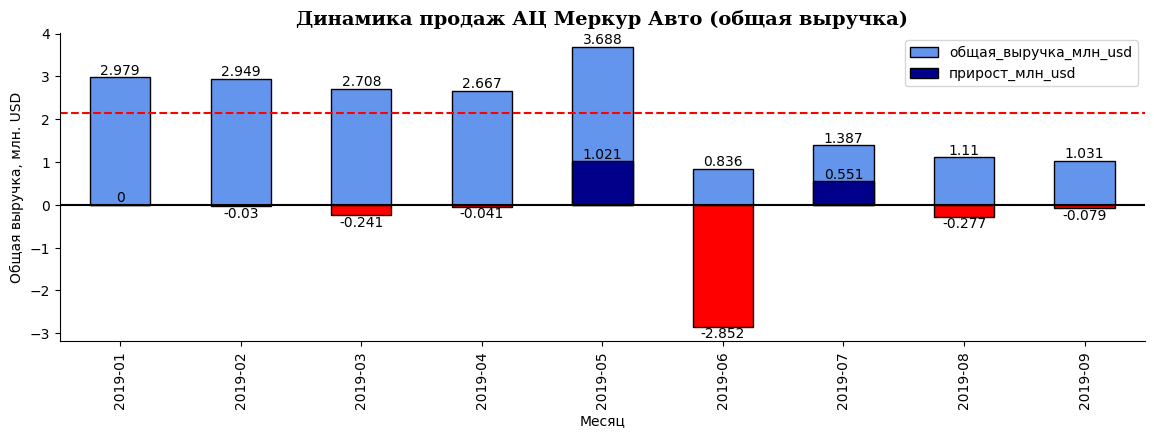

In [14]:
# Визуализируем данные об общей выручке АЦ Меркур Авто
fig, ax = plt.subplots()
total_revenue_mercur_auto.plot(x='год_месяц',
               y='общая_выручка_млн_usd',
               kind = 'bar',
               figsize=(14, 4),
               edgecolor = 'black',
               color='#6495ED',
               ax=ax)
color = ['r' if i<0 else 'darkblue' for i in total_revenue_mercur_auto['прирост_млн_usd'].to_list()]
total_revenue_mercur_auto.plot(x='год_месяц',
               y='прирост_млн_usd',
               kind = 'bar',
               figsize=(14, 4),
               edgecolor = 'black',
               color=color,
               ax=ax)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.axhline(y = total_revenue_mercur_auto['общая_выручка_млн_usd'].mean(), color = 'r', linestyle = '--')
plt.axhline(y = 0, color = 'black')
plt.title('Динамика продаж АЦ Меркур Авто (общая выручка)', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Месяц')
plt.ylabel('Общая выручка, млн. USD')
ax = plt.gca ()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [15]:
# Изучим описательную статистику по месячной общей выручке АЦ Меркур Авто
total_revenue_mercur_auto['общая_выручка_млн_usd'].describe()

count   9.00
mean    2.15
std     1.06
min     0.84
25%     1.11
50%     2.67
75%     2.95
max     3.69
Name: общая_выручка_млн_usd, dtype: float64

In [16]:
# Среднемесячная выручка январь-май 2019г.
total_revenue_mercur_auto[total_revenue_mercur_auto['год_месяц']<='2019-05']['общая_выручка_млн_usd'].mean()

2.9981999999999998

In [17]:
# Среднемесячная выручка июнь-сентябрь 2019г.
total_revenue_mercur_auto[total_revenue_mercur_auto['год_месяц']>'2019-05']['общая_выручка_млн_usd'].mean()

1.091

__________
__________
**Промежуточный вывод:**

Данные о выручке АЦ Меркур Авто:
- общая выручка с начала года 19.355 млн.USD;
- средняя по месяцу выручка - 2.15 млн.USD;
- c июня 2019 г. наблюдается резкое падение месячной выручки: в январе-мае среднемесячная выручка была 3 млн.USD, в июне-сентябре - 1.09 млн.USD

Причина падения выручки на данном этапе анализа не известна.
__________
__________

#### **5.3.2. Анализ выручку АЦ Меркур Авто в разрезе марок а/м**

In [18]:
# Объявим функцию analyses, которая анализирует выручку АЦ Меркур Авто в разрезе заданных параметров
def analyses(df, i, j = 'бренд'):
    print()
    print(f"Создадим таблицу выручка АЦ Меркур Авто в разрезе {j} - {i}")
    print()

    sales = df[df[j]==i].pivot_table(index=['год_месяц'],
                                             values = 'общая_стоимость_заказа(usd)',
                                             aggfunc='sum').reset_index()
    sales.columns = ['год_месяц', 'выручка_млн_usd']
    sales['выручка_млн_usd'] = round(sales['выручка_млн_usd']/1000000, 3)
    sales['прирост_млн_usd'] = sales['выручка_млн_usd'] - sales['выручка_млн_usd'].shift()
    sales['темп_прироста_%'] = sales['выручка_млн_usd'].pct_change()*100
    sales['выручка_млн_usd_снг'] = sales['выручка_млн_usd'].cumsum()
    display(sales.style.background_gradient(cmap='GnBu', axis=0))

    print()
    print(f"Изучим описательную статистику по месячной выручке АЦ Меркур Авто - {j} {i}")
    print()
    display(sales['выручка_млн_usd'].describe())

    print()
    print(f"Визуализируем данные о выручке АЦ Меркур Авто - {j} {i}")
    print()
    fig, ax = plt.subplots()
    sales.plot(x='год_месяц',
               y='выручка_млн_usd',
               kind = 'bar',
               figsize=(14, 4),
               edgecolor = 'black',
               color='#6495ED',
               ax=ax)
    color = ['r' if i<0 else 'darkblue' for i in sales['прирост_млн_usd'].to_list()]
    sales.plot(x='год_месяц',
               y='прирост_млн_usd',
               kind = 'bar',
               figsize=(14, 4),
               edgecolor = 'black',
               color=color,
               ax=ax)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.axhline(y = sales['выручка_млн_usd'].mean(), color = 'r', linestyle = '--')
    plt.axhline(y = 0, color = 'black')
    plt.title(f'Динамика продаж АЦ Меркур Авто (выручка) - {j} {i}', font={'weight':'bold', 'size': '14', 'family':'serif'})
    plt.xlabel('Месяц')
    plt.ylabel('Выручка, млн. USD')
    ax = plt.gca ()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

In [19]:
# Узнаем какими марками торгует АЦ Меркур Авто
brend = list(df_mercur_auto['бренд'].unique())
brend

['Audi', 'Porsche', 'Volkswagen']


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Audi



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,0.178000,nan,nan,0.178000
1,2019-02,0.092000,-0.086000,-48.314607,0.270000
2,2019-03,0.718000,0.626000,680.434783,0.988000
3,2019-04,0.428000,-0.290000,-40.389972,1.416000
4,2019-05,0.497000,0.069000,16.121495,1.913000
5,2019-06,0.309000,-0.188000,-37.826962,2.222000
6,2019-07,0.769000,0.460000,148.867314,2.991000
7,2019-08,0.499000,-0.270000,-35.110533,3.490000
8,2019-09,0.571000,0.072000,14.428858,4.061000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Audi



count   9.00
mean    0.45
std     0.23
min     0.09
25%     0.31
50%     0.50
75%     0.57
max     0.77
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Audi



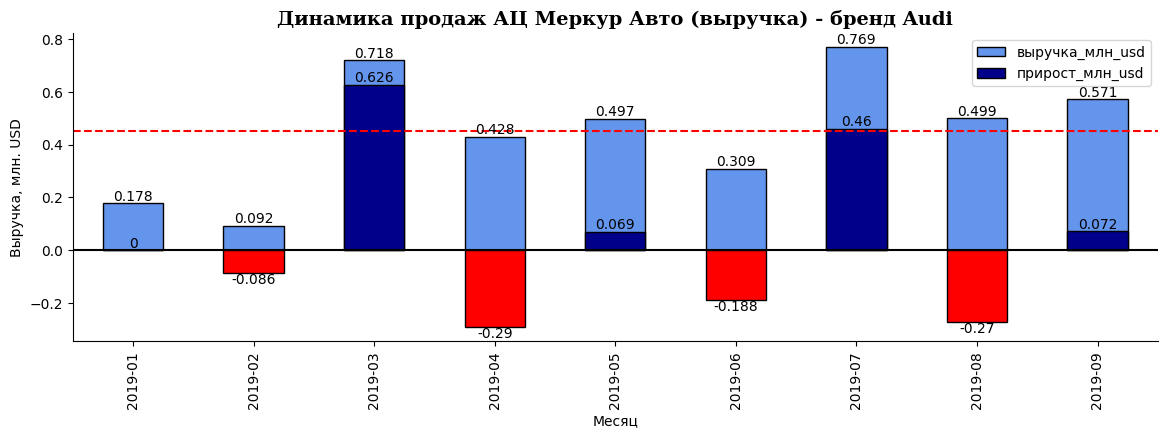


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Porsche



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,0.089000,nan,nan,0.089000
1,2019-02,0.554000,0.465000,522.471910,0.643000
2,2019-03,0.652000,0.098000,17.689531,1.295000
3,2019-04,0.767000,0.115000,17.638037,2.062000
4,2019-05,0.834000,0.067000,8.735332,2.896000
5,2019-06,0.527000,-0.307000,-36.810552,3.423000
6,2019-07,0.618000,0.091000,17.267552,4.041000
7,2019-08,0.612000,-0.006000,-0.970874,4.653000
8,2019-09,0.460000,-0.152000,-24.836601,5.113000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Porsche



count   9.00
mean    0.57
std     0.21
min     0.09
25%     0.53
50%     0.61
75%     0.65
max     0.83
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Porsche



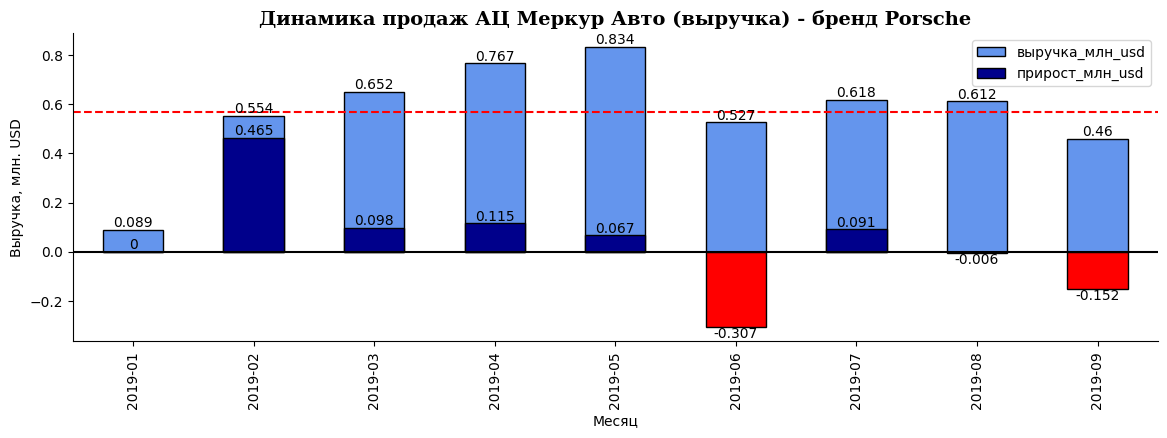


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Volkswagen



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,2.713000,nan,nan,2.713000
1,2019-02,2.303000,-0.410000,-15.112422,5.016000
2,2019-03,1.338000,-0.965000,-41.901867,6.354000
3,2019-04,1.473000,0.135000,10.089686,7.827000
4,2019-05,2.356000,0.883000,59.945689,10.183000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Volkswagen



count   5.00
mean    2.04
std     0.60
min     1.34
25%     1.47
50%     2.30
75%     2.36
max     2.71
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Volkswagen



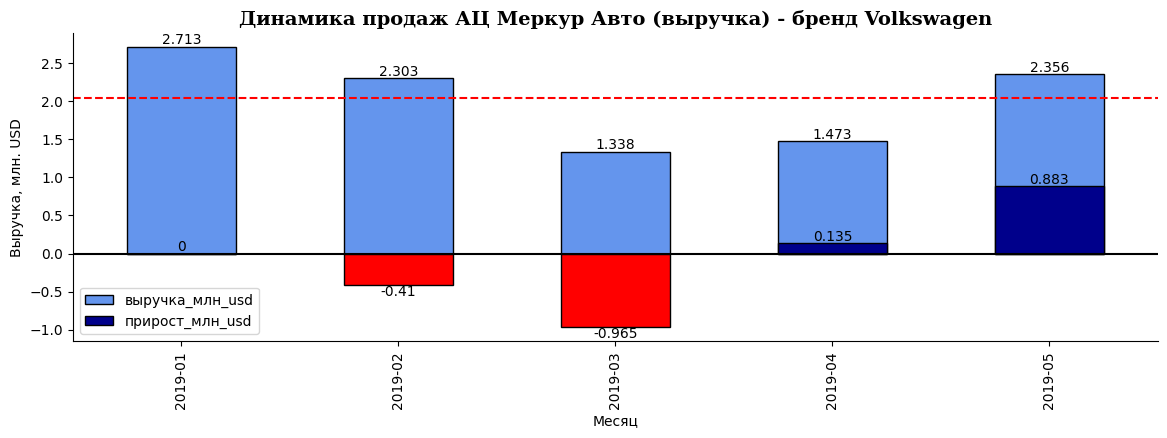

In [20]:
# Применим функцию analyses к каждой модели, продаваемой АЦ Меркур Авто
for i in brend:
    analyses(df_mercur_auto, i, 'бренд')

_____________
____________
Промежуточные выводы:

- АЦ Меркур Авто продавал в 2019 г. 3 марки а/м:
    - 'Audi',
    - 'Porsche',
    - 'Volkswagen'
- выручка с начала года от продажи 'Audi' составила 4.06 млн.USD;
- средняя за месяц выручка от продажи 'Audi' - 0.45 млн. USD;
- выручка с начала года от продажи 'Porsche' составила 5.11 млн.USD;
- средняя за месяц выручка от продажи 'Porsche' - 0.57 млн. USD;
- выручка с начала года от продажи 'Volkswagen' составила 10.18 млн.USD;
- средняя за месяц выручка от продажи 'Volkswagen' - 2.03 млн. USD.

**!!! С июня 2019 г. АЦ Меркур Авто прекратил продажу а/м марки 'Volkswagen' - основной марки, ранее продаваемой АЦ Меркур Авто.**

Это событие привело к падению в июне продаж и других марок а/м, но в июле-сентябре продажи 'Audi' и 'Porsche' восстановились. Однако отсутствие а/м марки 'Volkswagen' это компенсировать не смогло.

Продолжим анализ и ответим на вопрос:

**почему АЦ Меркур Авто прекратил продажу а/м марки 'Volkswagen' в июне 2019 г.**
___________
___________

**Шпаргалка:**

https://devpractice.ru/matplotlib-lesson-4-3-bar-pie/

https://vc.ru/u/1389654-machine-learning/649959-7-shagov-kotorye-pomogut-sdelat-vashi-stolbchatye-diagrammy-matplotlib-krasivymi

https://seaborn.pydata.org/generated/seaborn.barplot.html

In [21]:
# Создадим таблицу brend_revenue_mercur_auto для альтернативной визуализации выручки АЦ Меркур Авто в разрезе марок а/м
brend_revenue_mercur_auto = df_mercur_auto.pivot_table(index=['год_месяц', 'бренд'], values='общая_стоимость_заказа(usd)', aggfunc='sum').reset_index()
brend_revenue_mercur_auto.columns = ['год_месяц', 'бренд', 'выручка_млн_usd']
brend_revenue_mercur_auto['выручка_млн_usd'] = round(brend_revenue_mercur_auto['выручка_млн_usd']/1000000, 2)
(
    brend_revenue_mercur_auto
    .head()
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

,год_месяц,бренд,выручка_млн_usd
0,2019-01,Audi,0.180000
1,2019-01,Porsche,0.090000
2,2019-01,Volkswagen,2.710000
3,2019-02,Audi,0.090000
4,2019-02,Porsche,0.550000


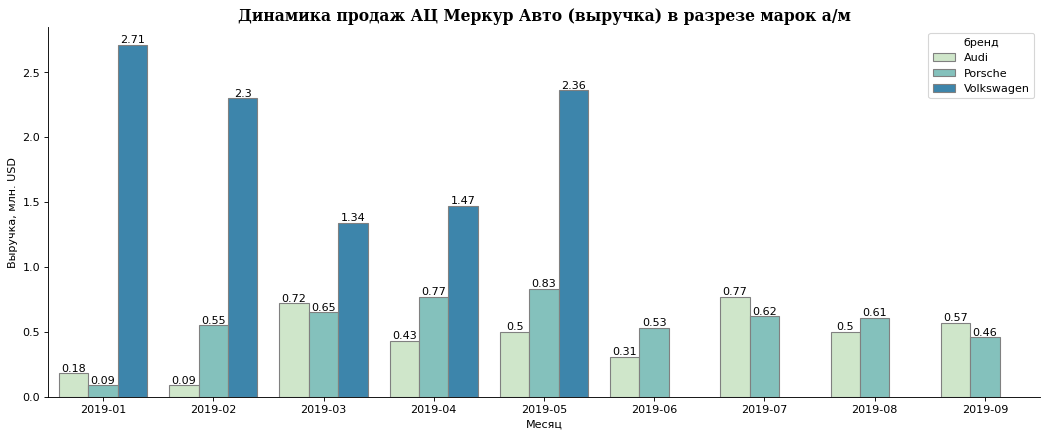

In [22]:
# Построим групповой барплот - альтернативная визуализация выручки АЦ Меркур Авто в разрезе марок а/м
plt.figure(figsize=(16, 6), dpi= 80)
sns.barplot(brend_revenue_mercur_auto, x="год_месяц", y="выручка_млн_usd", hue="бренд", palette='GnBu', edgecolor=".5")
ax = plt.gca ()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xlabel('Месяц')
plt.ylabel('Выручка, млн. USD')
plt.title(f'Динамика продаж АЦ Меркур Авто (выручка) в разрезе марок а/м', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.show()

### **5.4. Анализ продаж АЦ Меркур Авто по регионам**

#### **5.4.1. Анализ общей выручки АЦ Меркур Авто по регионам**

In [23]:
# Узнаем в каких регионах работает АЦ Меркур Авто
regions = list(df_mercur_auto['область'].unique())
regions

['г.Алматы',
 'г.Нур-Султан',
 'Костанайская область',
 'Атырауская область',
 'Карагандинская область',
 'Западно-Казахстанская область']


Создадим таблицу выручка АЦ Меркур Авто в разрезе область - г.Алматы



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,2.478000,nan,nan,2.478000
1,2019-02,1.763000,-0.715000,-28.853914,4.241000
2,2019-03,1.716000,-0.047000,-2.665910,5.957000
3,2019-04,2.102000,0.386000,22.494172,8.059000
4,2019-05,3.340000,1.238000,58.896289,11.399000
5,2019-06,0.836000,-2.504000,-74.970060,12.235000
6,2019-07,1.241000,0.405000,48.444976,13.476000
7,2019-08,0.964000,-0.277000,-22.320709,14.440000
8,2019-09,0.949000,-0.015000,-1.556017,15.389000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - область г.Алматы



count   9.00
mean    1.71
std     0.83
min     0.84
25%     0.96
50%     1.72
75%     2.10
max     3.34
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - область г.Алматы



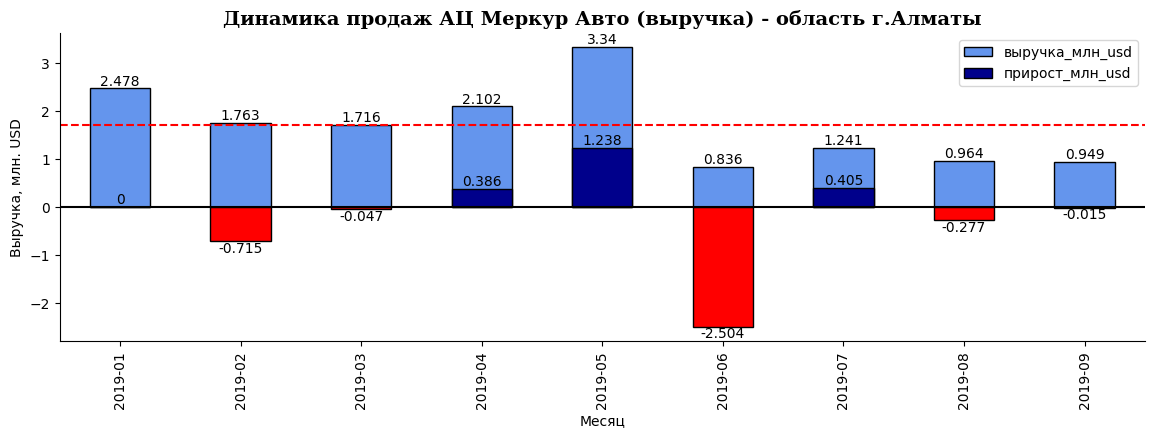


Создадим таблицу выручка АЦ Меркур Авто в разрезе область - г.Нур-Султан



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,0.305000,nan,nan,0.305000
1,2019-02,0.476000,0.171000,56.065574,0.781000
2,2019-03,0.107000,-0.369000,-77.521008,0.888000
3,2019-04,0.304000,0.197000,184.112150,1.192000
4,2019-05,0.072000,-0.232000,-76.315789,1.264000
5,2019-07,0.146000,0.074000,102.777778,1.410000
6,2019-08,0.147000,0.001000,0.684932,1.557000
7,2019-09,0.082000,-0.065000,-44.217687,1.639000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - область г.Нур-Султан



count   8.00
mean    0.20
std     0.14
min     0.07
25%     0.10
50%     0.15
75%     0.30
max     0.48
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - область г.Нур-Султан



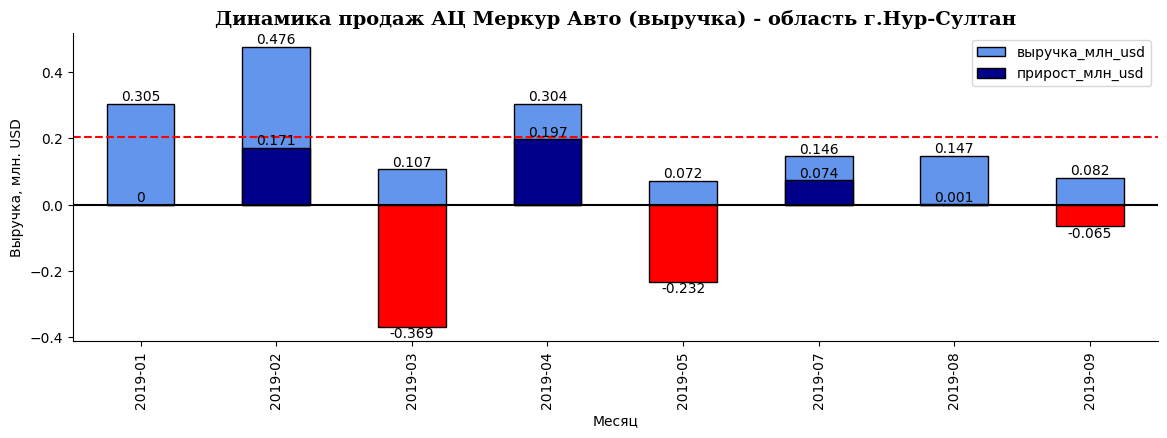


Создадим таблицу выручка АЦ Меркур Авто в разрезе область - Костанайская область



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,0.107000,nan,nan,0.107000
1,2019-02,0.073000,-0.034000,-31.775701,0.180000
2,2019-03,0.470000,0.397000,543.835616,0.650000
3,2019-04,0.081000,-0.389000,-82.765957,0.731000
4,2019-05,0.072000,-0.009000,-11.111111,0.803000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - область Костанайская область



count   5.00
mean    0.16
std     0.17
min     0.07
25%     0.07
50%     0.08
75%     0.11
max     0.47
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - область Костанайская область



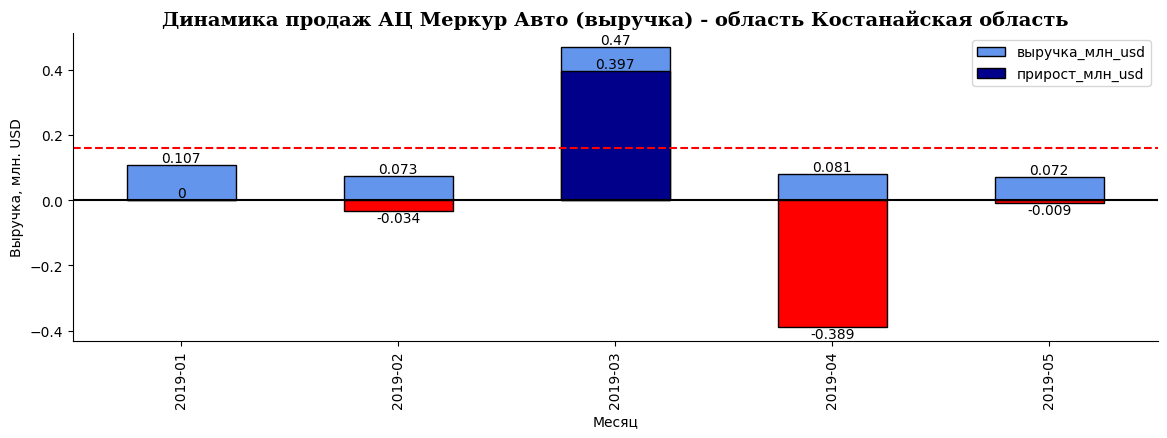


Создадим таблицу выручка АЦ Меркур Авто в разрезе область - Атырауская область



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,0.089000,nan,nan,0.089000
1,2019-02,0.119000,0.030000,33.707865,0.208000
2,2019-03,0.214000,0.095000,79.831933,0.422000
3,2019-04,0.164000,-0.050000,-23.364486,0.586000
4,2019-05,0.204000,0.040000,24.390244,0.790000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - область Атырауская область



count   5.00
mean    0.16
std     0.05
min     0.09
25%     0.12
50%     0.16
75%     0.20
max     0.21
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - область Атырауская область



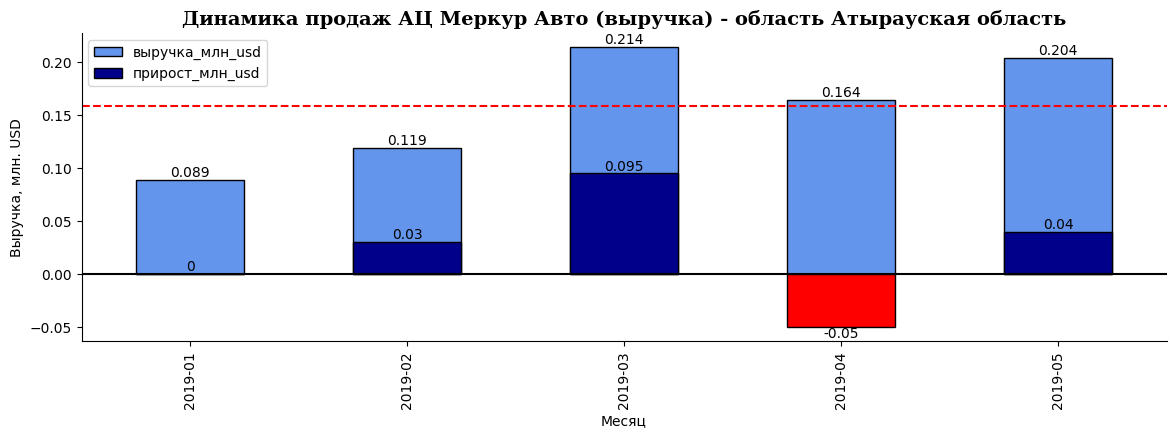


Создадим таблицу выручка АЦ Меркур Авто в разрезе область - Карагандинская область



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-02,0.334000,nan,nan,0.334000
1,2019-03,0.096000,-0.238000,-71.257485,0.430000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - область Карагандинская область



count   2.00
mean    0.22
std     0.17
min     0.10
25%     0.16
50%     0.22
75%     0.27
max     0.33
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - область Карагандинская область



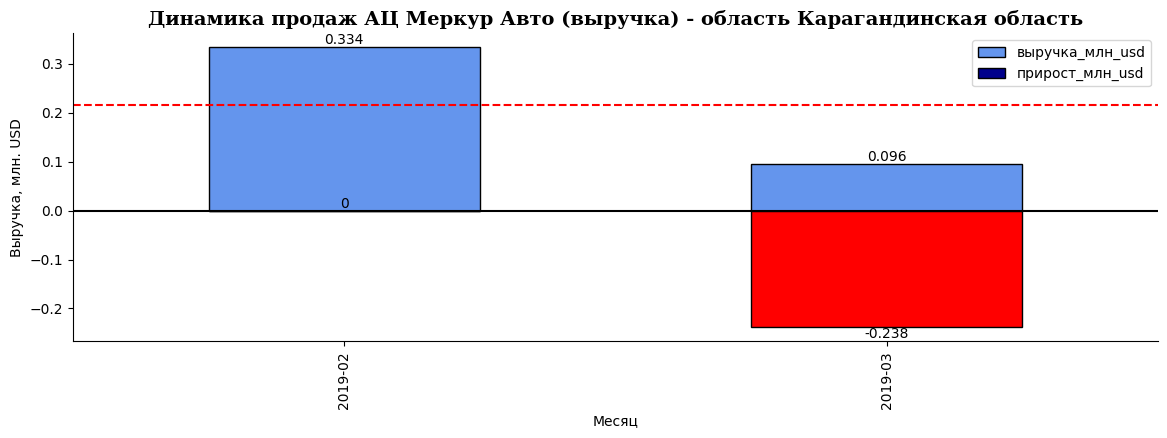


Создадим таблицу выручка АЦ Меркур Авто в разрезе область - Западно-Казахстанская область



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-02,0.184000,nan,nan,0.184000
1,2019-03,0.104000,-0.080000,-43.478261,0.288000
2,2019-04,0.016000,-0.088000,-84.615385,0.304000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - область Западно-Казахстанская область



count   3.00
mean    0.10
std     0.08
min     0.02
25%     0.06
50%     0.10
75%     0.14
max     0.18
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - область Западно-Казахстанская область



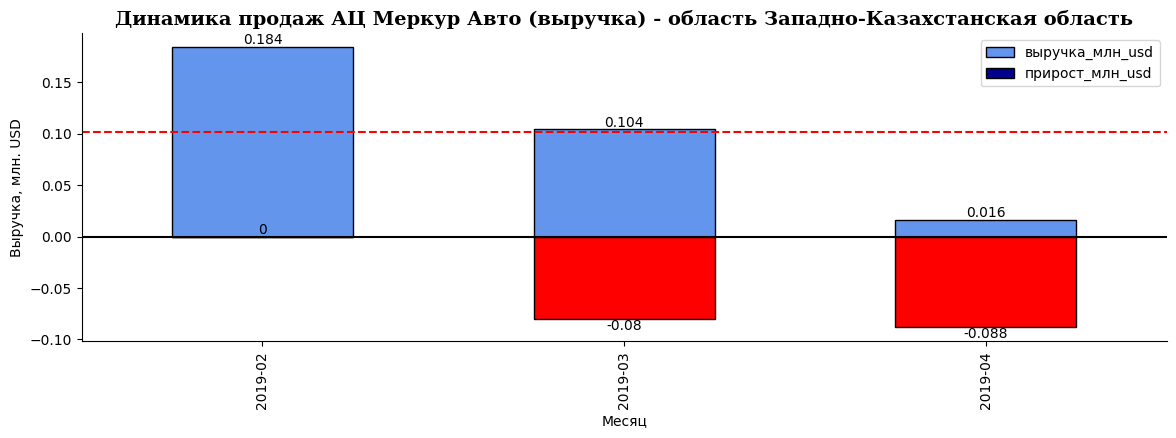

In [24]:
# Применим функцию analyses к каждому региону, где присутствует АЦ Меркур Авто
for i in regions:
    analyses(df_mercur_auto, i, 'область')

In [25]:
# Создадим таблицу regions_revenue_mercur_auto для fyfkbpf выручки АЦ Меркур Авто в разрезе регионов
regions_revenue_mercur_auto = df_mercur_auto.pivot_table(index=['год_месяц', 'область'], values='общая_стоимость_заказа(usd)', aggfunc='sum').reset_index()
regions_revenue_mercur_auto.columns = ['год_месяц', 'область', 'выручка_млн_usd']
regions_revenue_mercur_auto['выручка_млн_usd'] = round(regions_revenue_mercur_auto['выручка_млн_usd']/1000000, 1)
(
    regions_revenue_mercur_auto
    .head()
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

,год_месяц,область,выручка_млн_usd
0,2019-01,Атырауская область,0.100000
1,2019-01,Костанайская область,0.100000
2,2019-01,г.Алматы,2.500000
3,2019-01,г.Нур-Султан,0.300000
4,2019-02,Атырауская область,0.100000


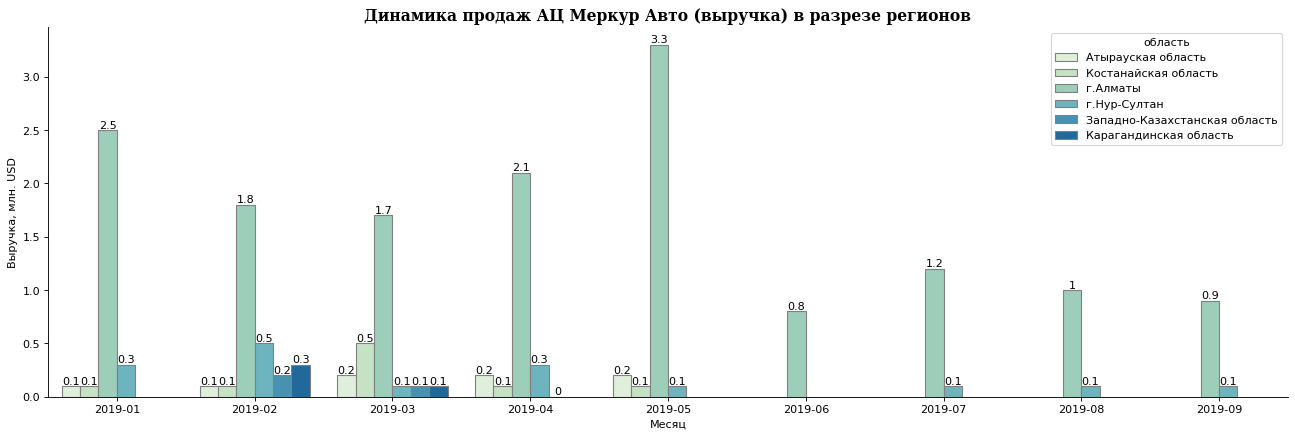

In [26]:
# Построим групповой барплот - альтернативная визуализация выручки АЦ Меркур Авто в разрезе регионов
plt.figure(figsize=(20, 6), dpi= 80)
sns.barplot(regions_revenue_mercur_auto, x="год_месяц", y="выручка_млн_usd", hue="область", palette='GnBu', edgecolor=".5")
ax = plt.gca ()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
ax.bar_label(ax.containers[5])
plt.xlabel('Месяц')
plt.ylabel('Выручка, млн. USD')
plt.title(f'Динамика продаж АЦ Меркур Авто (выручка) в разрезе регионов', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.show()

_____________
____________
**Промежуточные выводы:**

- АЦ Меркур Авто продавал в 2019 г. а/м в 6-х регионах:
    - **г.Алматы** -

    (выручка с начала года - 15.4 млн.$, среднемесяная выручка - 1.71 млн.$, январь-сентябрь 2019 г).
    - **г.Нур-Султан** -     
    
    (выручка с начала года - 1.6 млн.$, среднемечсяная выручка - 0.20 млн.$, январь-сентябрь 2019 г).
    - **Костанайская область** -

    (выручка с начала года - 0.8 млн.$, среднемечсяная выручка - 0.16 млн.$, январь-май 2019 г.).
    - **Атырауская область** -

    (выручка с начала года - 0.8 млн.$, среднемечсяная выручка - 0.16 млн.$, январь-май 2019 г.).
    - **Карагандинская область** -

    (выручка с начала года - 0.4 млн.$, среднемесячная выручка - 0.22 млн.$, февраль-март 2019 г.).
    - **Западно-Казахстанская область** -

    (выручка с начала года - 0.3 млн.$, среднемесячная выручка - 0.10 млн.$, февраль-апрель 2019 г.).

До июня 2019 г. (остановка продаж а/м 'Volkswagen') постоянными регионами присутствия АЦ Меркур Авто были:

- **г.Алматы,**
- **г.Нур-Султан,**
- **Костанайская область,**
-**Атырауская область.**

С февраля 2019 г. АЦ Меркур Авто начал работать в 2-х новых для себя регионах:

- **Карагандинская область,**
- **Западно-Казахстанская область.**

Скорее всего выход в новые регионы был связан с существенными для компании затратами.

Однако остановка продаж а/м марки 'Volkswagen' вынудила АЦ Меркур Авто прекратить работу на новых рынках. **Возможно компании пришлось признать убытки.**

Также по причине остановки продаж а/м марки 'Volkswagen' АЦ Меркур Авто прекратил с июня 2019 г. работу в Костанайской и Атырауская области.

**По состоянию на сентябрь 2019 г. АЦ Меркур Авто продолжал работу только в 2-х регионах:**

- **г.Алматы,**
- **г.Нур-Султан.**
___________
___________

**Гипотеза:**

Сделаем предположение, что в г.Алматы и г.Нур-Султан АЦ Меркур Авто был представлен как мультибрендовая компания, а в регионах - только как дилер марки 'Volkswagen'.

Проверим данную гипотезу в следующем разделе проекта.

#### **5.4.2. Анализ общей выручки АЦ Меркур Авто по регионам и маркам а/м**

##### **5.4.2.1. Анализ общей выручки АЦ Меркур Авто по маркам а/м  - г.Алматы**

In [27]:
# Узнаем какими марками АЦ Меркур Авто представлен в г.Алматы
brend2 = list(df_mercur_auto[df_mercur_auto['область'] == 'г.Алматы']['бренд'].unique())
brend2

['Audi', 'Porsche', 'Volkswagen']


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Audi



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,0.178000,nan,nan,0.178000
1,2019-02,0.049000,-0.129000,-72.471910,0.227000
2,2019-03,0.669000,0.620000,1265.306122,0.896000
3,2019-04,0.347000,-0.322000,-48.131540,1.243000
4,2019-05,0.353000,0.006000,1.729107,1.596000
5,2019-06,0.309000,-0.044000,-12.464589,1.905000
6,2019-07,0.696000,0.387000,125.242718,2.601000
7,2019-08,0.352000,-0.344000,-49.425287,2.953000
8,2019-09,0.489000,0.137000,38.920455,3.442000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Audi



count   9.00
mean    0.38
std     0.21
min     0.05
25%     0.31
50%     0.35
75%     0.49
max     0.70
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Audi



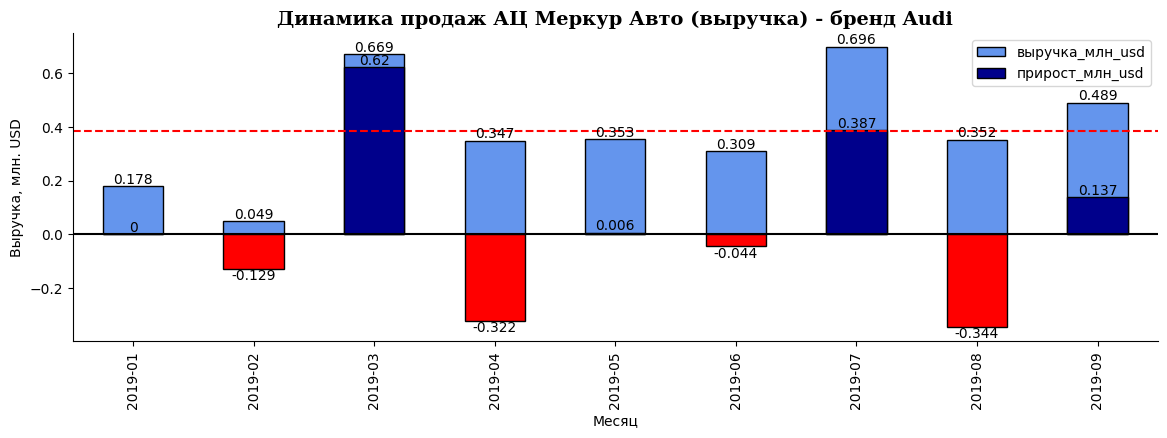


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Porsche



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,0.089000,nan,nan,0.089000
1,2019-02,0.554000,0.465000,522.471910,0.643000
2,2019-03,0.652000,0.098000,17.689531,1.295000
3,2019-04,0.767000,0.115000,17.638037,2.062000
4,2019-05,0.834000,0.067000,8.735332,2.896000
5,2019-06,0.527000,-0.307000,-36.810552,3.423000
6,2019-07,0.545000,0.018000,3.415560,3.968000
7,2019-08,0.612000,0.067000,12.293578,4.580000
8,2019-09,0.460000,-0.152000,-24.836601,5.040000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Porsche



count   9.00
mean    0.56
std     0.21
min     0.09
25%     0.53
50%     0.55
75%     0.65
max     0.83
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Porsche



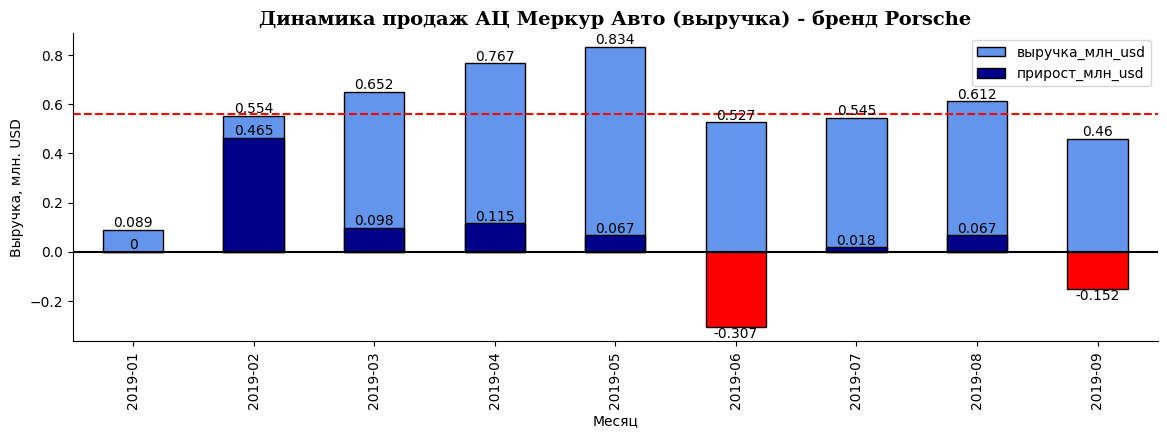


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Volkswagen



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,2.211000,nan,nan,2.211000
1,2019-02,1.160000,-1.051000,-47.535052,3.371000
2,2019-03,0.395000,-0.765000,-65.948276,3.766000
3,2019-04,0.989000,0.594000,150.379747,4.755000
4,2019-05,2.152000,1.163000,117.593529,6.907000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Volkswagen



count   5.00
mean    1.38
std     0.78
min     0.40
25%     0.99
50%     1.16
75%     2.15
max     2.21
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Volkswagen



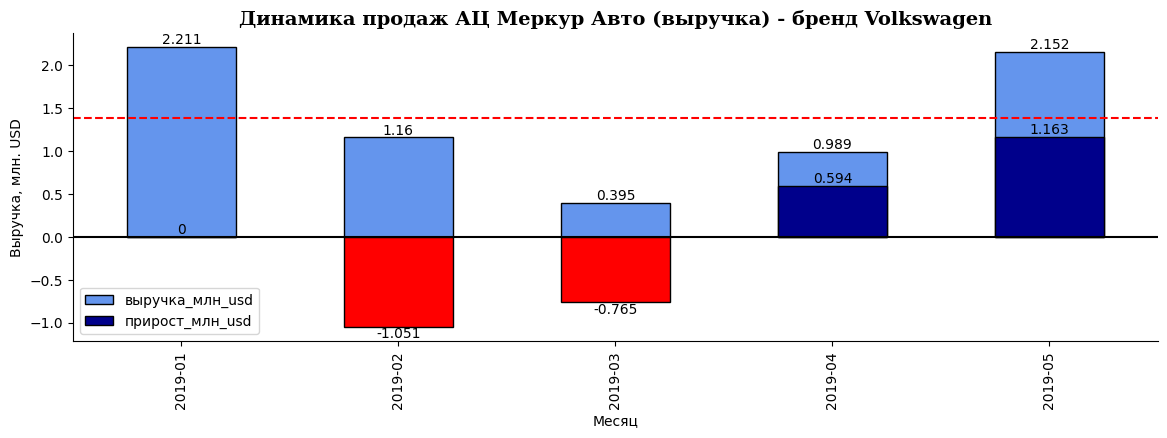

In [28]:
# Применим функцию analyses
for i in brend2:
    analyses(df_mercur_auto[df_mercur_auto['область'] == 'г.Алматы'], i, 'бренд')

##### **5.4.2.2. Анализ общей выручки АЦ Меркур Авто по маркам а/м  - г.Нур-Султан**

In [29]:
# Узнаем какими марками АЦ Меркур Авто представлен в г.Нур-Султан
brend3 = list(df_mercur_auto[df_mercur_auto['область'] == 'г.Нур-Султан']['бренд'].unique())
brend3

['Audi', 'Porsche', 'Volkswagen']


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Audi



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-02,0.043000,nan,nan,0.043000
1,2019-03,0.049000,0.006000,13.953488,0.092000
2,2019-05,0.072000,0.023000,46.938776,0.164000
3,2019-07,0.073000,0.001000,1.388889,0.237000
4,2019-08,0.147000,0.074000,101.369863,0.384000
5,2019-09,0.082000,-0.065000,-44.217687,0.466000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Audi



count   6.00
mean    0.08
std     0.04
min     0.04
25%     0.05
50%     0.07
75%     0.08
max     0.15
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Audi



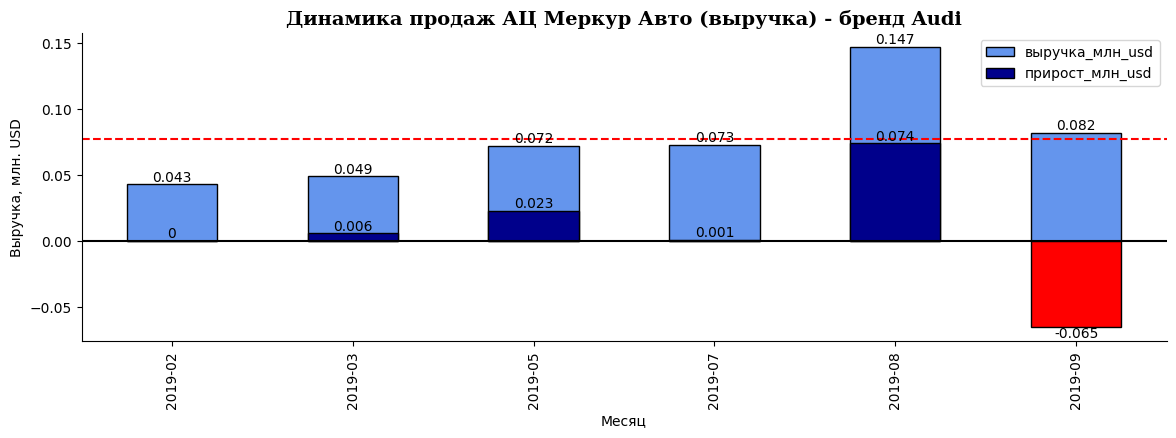


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Porsche



/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-07,0.073000,nan,nan,0.073000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Porsche



count   1.00
mean    0.07
std      NaN
min     0.07
25%     0.07
50%     0.07
75%     0.07
max     0.07
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Porsche



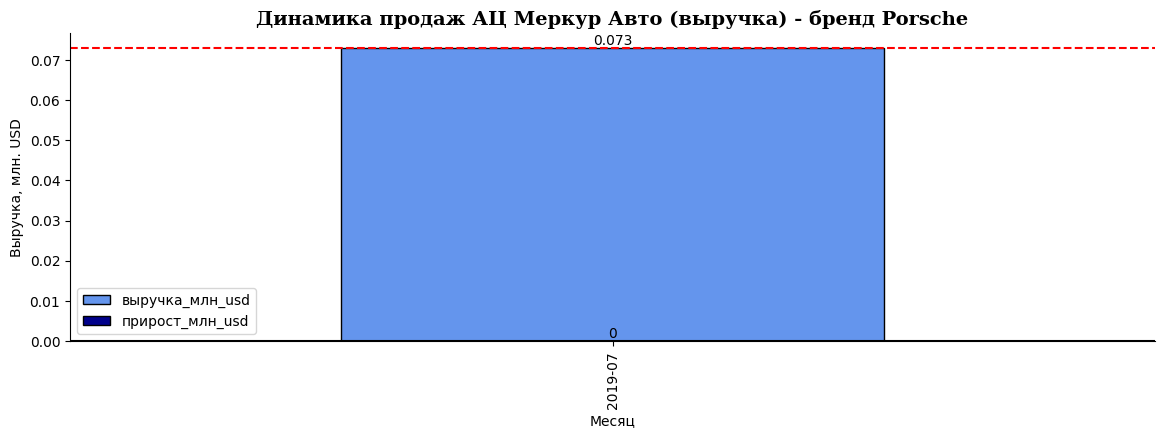


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Volkswagen



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,0.305000,nan,nan,0.305000
1,2019-02,0.433000,0.128000,41.967213,0.738000
2,2019-03,0.058000,-0.375000,-86.605081,0.796000
3,2019-04,0.304000,0.246000,424.137931,1.100000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Volkswagen



count   4.00
mean    0.28
std     0.16
min     0.06
25%     0.24
50%     0.30
75%     0.34
max     0.43
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Volkswagen



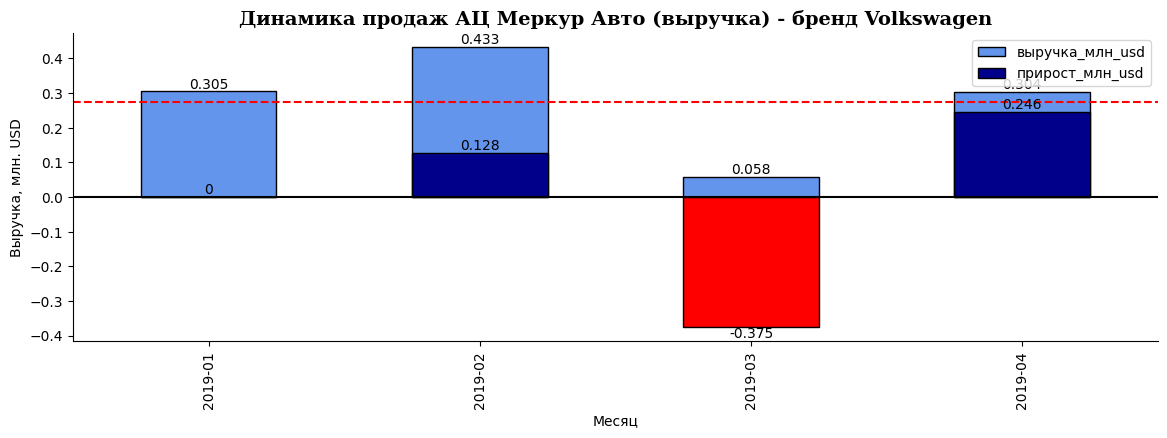

In [30]:
# Применим функцию analyses
for i in brend3:
    analyses(df_mercur_auto[df_mercur_auto['область'] == 'г.Нур-Султан'], i, 'бренд')

##### **5.4.2.3. Анализ общей выручки АЦ Меркур Авто по маркам а/м  - Костанайская область**

In [31]:
# Узнаем какими марками АЦ Меркур Авто представлен в  Костанайской области
brend4 = list(df_mercur_auto[df_mercur_auto['область'] == 'Костанайская область']['бренд'].unique())
brend4

['Volkswagen', 'Audi']


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Volkswagen



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,0.107000,nan,nan,0.107000
1,2019-02,0.073000,-0.034000,-31.775701,0.180000
2,2019-03,0.470000,0.397000,543.835616,0.650000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Volkswagen



count   3.00
mean    0.22
std     0.22
min     0.07
25%     0.09
50%     0.11
75%     0.29
max     0.47
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Volkswagen



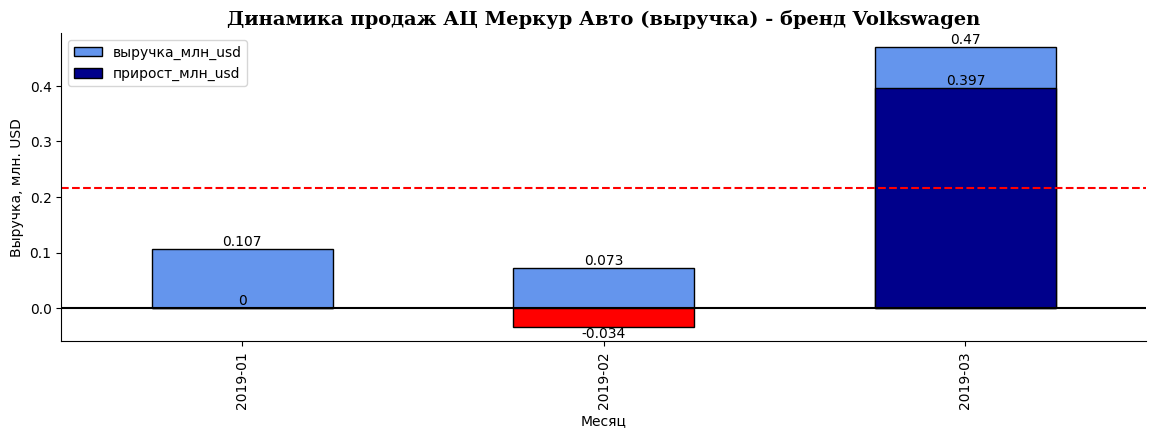


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Audi



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-04,0.081000,nan,nan,0.081000
1,2019-05,0.072000,-0.009000,-11.111111,0.153000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Audi



count   2.00
mean    0.08
std     0.01
min     0.07
25%     0.07
50%     0.08
75%     0.08
max     0.08
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Audi



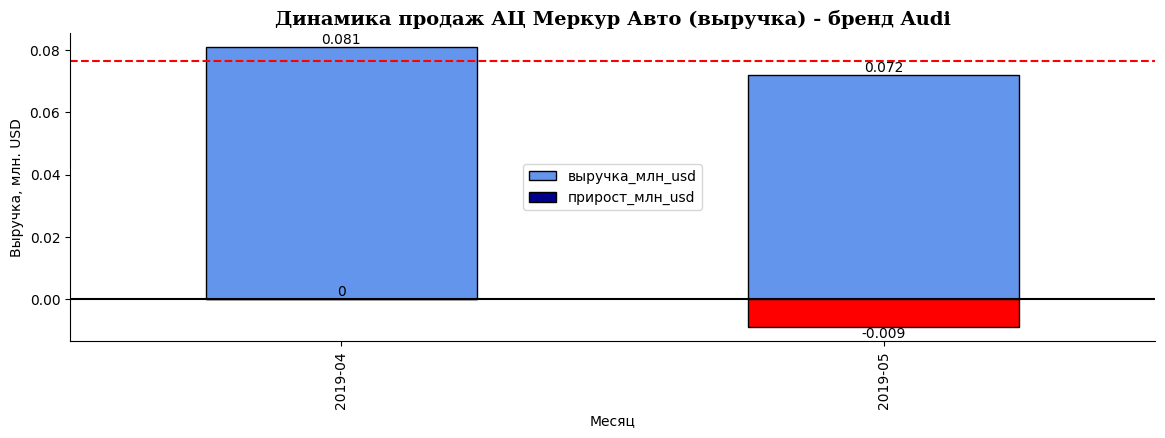

In [32]:
# Применим функцию analyses
for i in brend4:
    analyses(df_mercur_auto[df_mercur_auto['область'] == 'Костанайская область'], i, 'бренд')

##### **5.4.2.4. Анализ общей выручки АЦ Меркур Авто по маркам а/м  - Атырауская область**

In [33]:
# Узнаем какими марками АЦ Меркур Авто представлен в  Атырауской области
brend5 = list(df_mercur_auto[df_mercur_auto['область'] == 'Атырауская область']['бренд'].unique())
brend5

['Volkswagen']


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Volkswagen



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-01,0.089000,nan,nan,0.089000
1,2019-02,0.119000,0.030000,33.707865,0.208000
2,2019-03,0.214000,0.095000,79.831933,0.422000
3,2019-04,0.164000,-0.050000,-23.364486,0.586000
4,2019-05,0.204000,0.040000,24.390244,0.790000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Volkswagen



count   5.00
mean    0.16
std     0.05
min     0.09
25%     0.12
50%     0.16
75%     0.20
max     0.21
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Volkswagen



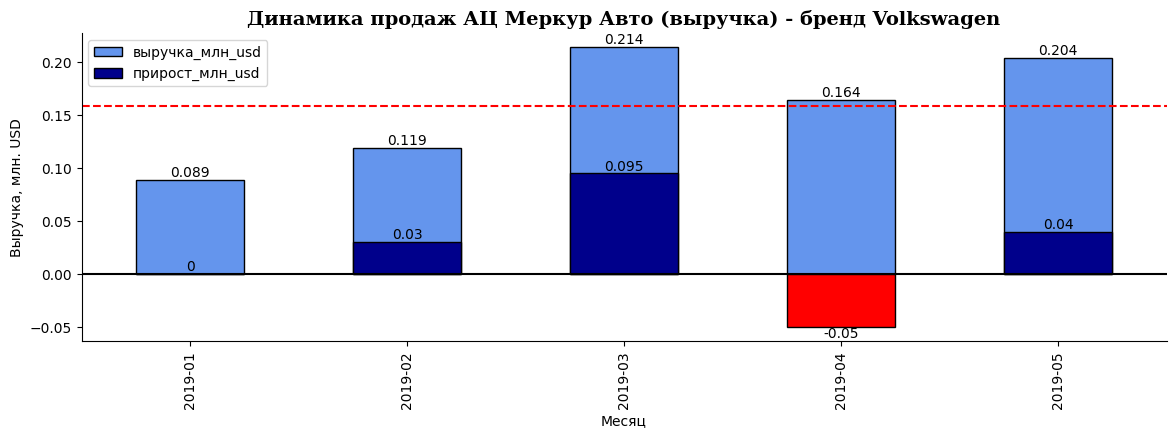

In [34]:
# Применим функцию analyses
for i in brend5:
    analyses(df_mercur_auto[df_mercur_auto['область'] == 'Атырауская область'], i, 'бренд')

##### **5.4.2.5. Анализ общей выручки АЦ Меркур Авто по маркам а/м  - Карагандинская область**

In [35]:
# Узнаем какими марками АЦ Меркур Авто представлен в   Карагандинской области
brend6 = list(df_mercur_auto[df_mercur_auto['область'] == 'Карагандинская область']['бренд'].unique())
brend6

['Volkswagen']


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Volkswagen



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-02,0.334000,nan,nan,0.334000
1,2019-03,0.096000,-0.238000,-71.257485,0.430000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Volkswagen



count   2.00
mean    0.22
std     0.17
min     0.10
25%     0.16
50%     0.22
75%     0.27
max     0.33
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Volkswagen



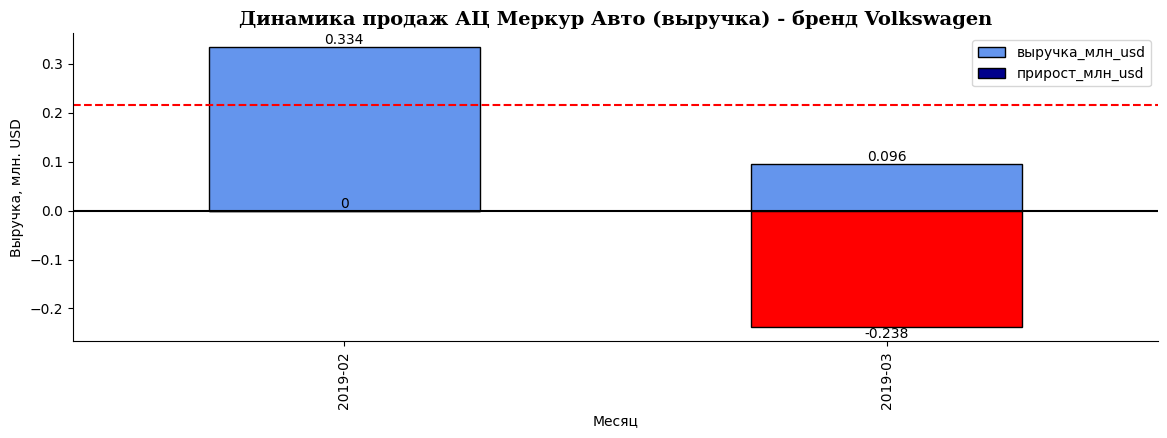

In [36]:
# Применим функцию analyses
for i in brend6:
    analyses(df_mercur_auto[df_mercur_auto['область'] == 'Карагандинская область'], i, 'бренд')

##### **5.4.2.6. Анализ общей выручки АЦ Меркур Авто по маркам а/м  - Западно-Казахстанская область**

In [37]:
# Узнаем какими марками АЦ Меркур Авто представлен в Западно-Казахстанской области
brend7 = list(df_mercur_auto[df_mercur_auto['область'] == 'Западно-Казахстанская область']['бренд'].unique())
brend7

['Volkswagen']


Создадим таблицу выручка АЦ Меркур Авто в разрезе бренд - Volkswagen



,год_месяц,выручка_млн_usd,прирост_млн_usd,темп_прироста_%,выручка_млн_usd_снг
0,2019-02,0.184000,nan,nan,0.184000
1,2019-03,0.104000,-0.080000,-43.478261,0.288000
2,2019-04,0.016000,-0.088000,-84.615385,0.304000



Изучим описательную статистику по месячной выручке АЦ Меркур Авто - бренд Volkswagen



count   3.00
mean    0.10
std     0.08
min     0.02
25%     0.06
50%     0.10
75%     0.14
max     0.18
Name: выручка_млн_usd, dtype: float64


Визуализируем данные о выручке АЦ Меркур Авто - бренд Volkswagen



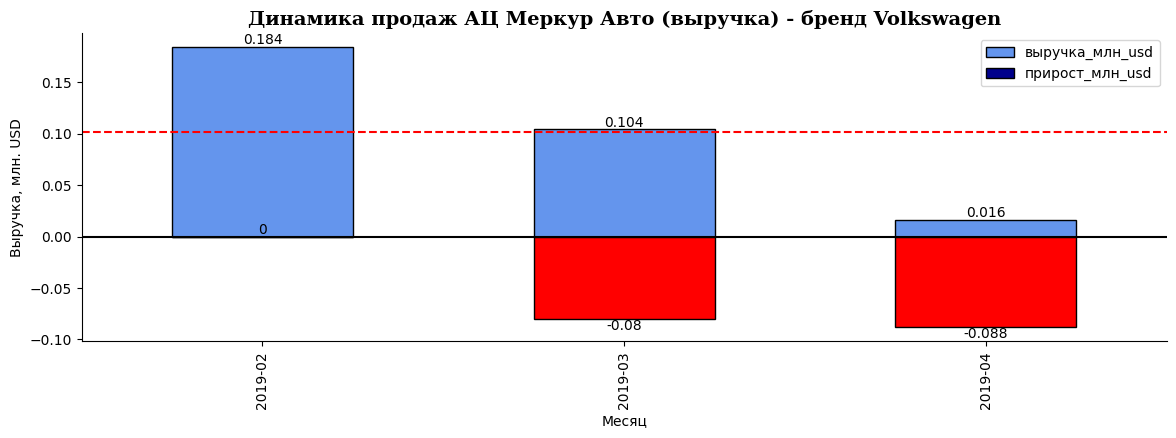

In [38]:
# Применим функцию analyses
for i in brend7:
    analyses(df_mercur_auto[df_mercur_auto['область'] == 'Западно-Казахстанская область'], i, 'бренд')

##### **5.4.2.7. Промежуточный вывод**

___________
____________
Количество брендов, которыми АЦ Меркур Авто представлен в регионах продаж:

- г.Алматы - 3 бренда;
- г.Нур-Султан - 3 бренда;
- Костанайская область - 2 бренда;
- Атырауская область - 1 бренд;
- Карагандинская область - 1 бренд;
- Западно-Казахстанская область - 1 бренд

**Гипотеза подтвердилась:**

- в г.Алматы и г.Нур-Султан АЦ Меркур Авто представлен как мультибрендовый автоцентр;
- в регионах АЦ Меркур Авто был представлен как дилер бренда Volkswagen (в Костанайской области были единичные продажи Audi).

Поэтому прекращение продаж Volkswagen в июне 2019 года привело к прекращению деятельности АЦ Меркур Авто в регионах.

### **5.4. Конкурентный анализ АЦ Меркур Авто**

**Шпаргалка:**

https://roistat.com/rublog/konkurentnij-analiz/

**Справка:**

**Что такое конкурентный анализ:**

Конкурентный анализ позволяет определить основных конкурентов, проанализировать их сильные и слабые стороны, стратегию позиционирования. Это знание можно использовать, чтобы улучшать собственную бизнес-стратегию и изменять товар или услугу по запросу рынка.

**Шаги по проведению конкурентного анализа:**

- определить конкурентов

**Прямые конкуренты** предоставляют продукты, аналогичные вашему.

Продукты **косвенных конкурентов** отличаются от вашего, но удовлетворяют ту же потребность клиента.

Сравнивайте себя только с прямыми конкурентами. Целевая аудитория косвенных конкурентов может сильно отличаться.
- проанализировать продукты конкурентов
- изучить тактику и результаты продаж конкурентов
- изучить цены и преимущества конкурентов
- проанализируйть стоимость доставки
- узнать какой дополнительный контент конкуренты дают аудитории


____________
В случае с АЦ Меркур Авто:

- прямые конкуренты - автоцентры, продающие теже бренды что АЦ Меркур Авто в регионах присутствия АЦ Меркур Авто;
- косвенные конкуренты - автоцентры, присутствующие в тех же регионах, что АЦ Меркур Авто, и продающие тот же класс а/м других брендов.

**Наша задача:**

- выявить прямых конкурентов АЦ Меркур Авто в разрезе брендов/классов а/м и регионов;
- сравнить выручку (долю рынка) АЦ Меркур Авто и прямых конкурентов;
- выявить косвенных конкурентов;
- найти сильные стороны АЦ Меркур Авто;
- найти сегменты/классы/регионы в которые АЦ Меркур Авто может зайти.

Потеряв возможность быть дилером Volkswagen АЦ Меркур Авто может:

- продавать другие "свои" бренды в уже освоеных регионах;
- продавать тот же класс а/м других брендов в регионах своего присутствия;
- выйти со "своими" брендами на новые перспективные территории.

**Для выработки новой маркетинговой стратегии конкурентный анализ ОЧЕНЬ ВАЖЕН. Ошибка в выборе стратегии может привести к банкротству компании.**

#### **5.4.1. Выясним почему АЦ Меркур Авто перестал быть дилером Volkswagen**

In [39]:
# Создадим датафрейм df_volkswagen с данными о продажах а/м марки Volkswagen в Казахстане
df_volkswagen = df[(df['бренд']=='Volkswagen')&(df['сегментация_2013']!='Коммерческие автомобили')].pivot_table(index=['год_месяц', 'компания'], values='общая_стоимость_заказа(usd)', aggfunc='sum').reset_index()
df_volkswagen["год_месяц"] = pd.to_datetime(df_volkswagen["год_месяц"].astype('str'), format='%Y-%m')
df_volkswagen["общая_стоимость_заказа(usd)"] = round(df_volkswagen["общая_стоимость_заказа(usd)"]/1000000, 2)
df_volkswagen

,год_месяц,компания,общая_стоимость_заказа(usd)
0,2019-01-01,Mercur Auto,2.46
1,2019-01-01,Автодом Motors KST,0.34
2,2019-01-01,Автомир-Центр,0.11
3,2019-01-01,"ТОО ""Eurasia Motor Zhaik""",0.17
4,2019-02-01,Mercur Auto,2.30
5,2019-02-01,Автодом Motors KST,0.32
6,2019-03-01,Mercur Auto,1.34
7,2019-04-01,Mercur Auto,1.47
8,2019-04-01,Volkswagen Group Rus,0.21
9,2019-04-01,Автодом Motors KST,0.40


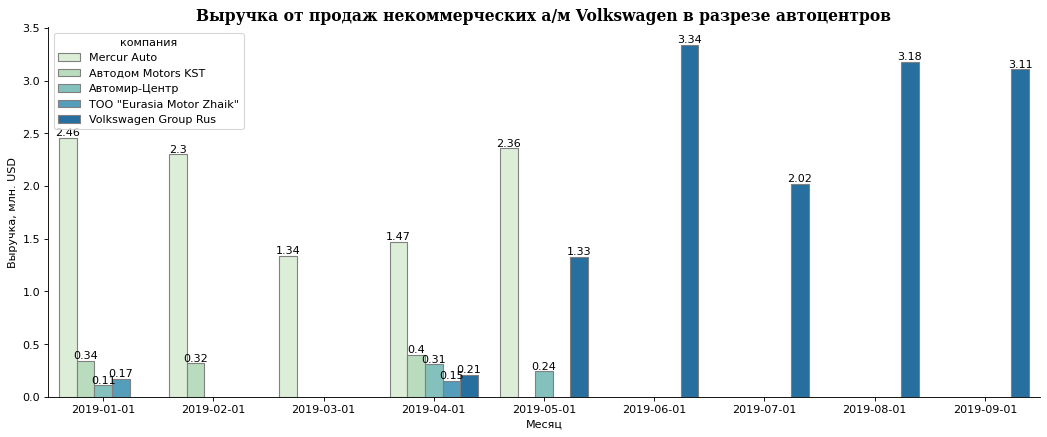

In [40]:
# Построим групповой барплот - выручка от продажи некоммерческих а/м Volkswagen в разрезе компаний
plt.figure(figsize=(16, 6), dpi= 80)
sns.barplot(df_volkswagen, x="год_месяц", y="общая_стоимость_заказа(usd)", hue="компания", palette='GnBu', edgecolor=".5")
ax = plt.gca ()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
plt.xlabel('Месяц')
plt.ylabel('Выручка, млн. USD')
plt.title(f'Выручка от продаж некоммерческих а/м Volkswagen в разрезе автоцентров', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.show()

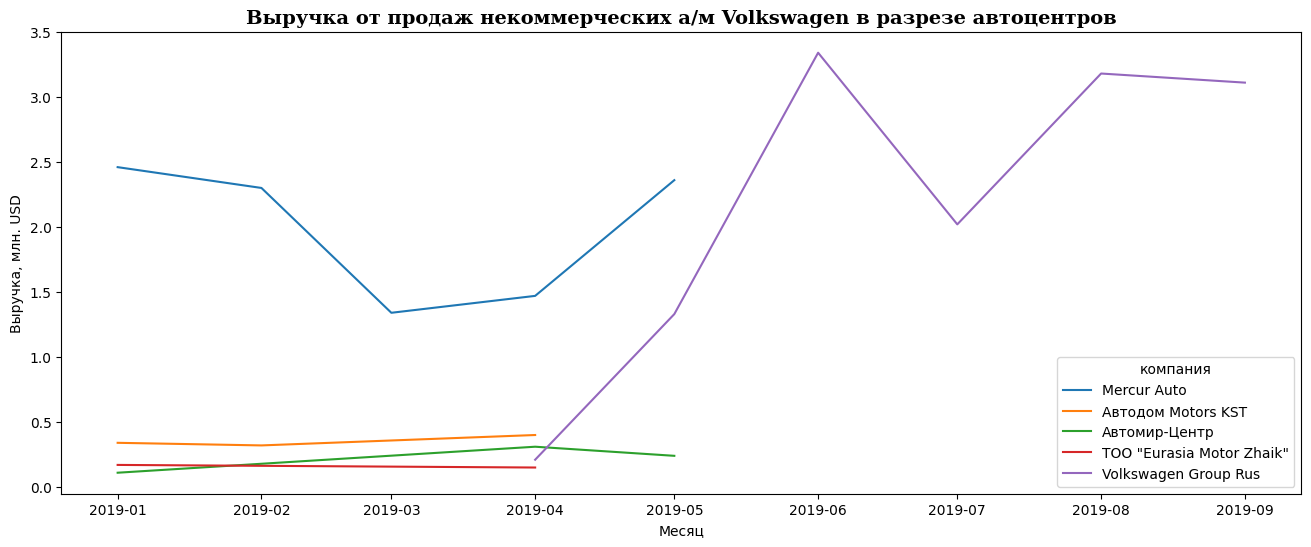

In [41]:
# Альтернативная визуализация - lineplot
plt.figure(figsize=(16,6))
sns.lineplot(data=df_volkswagen, x = 'год_месяц', y = 'общая_стоимость_заказа(usd)', hue = 'компания')
plt.xlabel('Месяц')
plt.ylabel('Выручка, млн. USD')
plt.title(f'Выручка от продаж некоммерческих а/м Volkswagen в разрезе автоцентров', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.show()


_____________
____________
**Промежуточный вывод:**

В апреле 2019 г. ГК Volkswagen Group Rus создала собственную сеть автоцентров в Казахстане и к июню 2019 г. полностью отказалась от услуг дилеров, крупнейшим из которых был АЦ Меркур Авто.

**Таким образом, найден конкурент фактически выдавивший в 2019 г. АЦ Меркур Авто с рынка легковых а/м В_класса и внедорожников класса Компактные SUV - Volkswagen Group Rus.**

Для продолжения деятельности АЦ Меркур Авто необходимо искать замену бренду и/или менять сегмент/класс продаваемых а/м.
____________
____________

#### **5.4.2. Построим матрицу доля рынка АЦ Меркур Авто по регионам и классам а/м: до и после 01.06.2019**

In [42]:
# Построим матрицу доля рынка АЦ Меркур Авто по регионам и классам а/м до 01.06.2019
df_market_old = df[(df['область'].isin(list(df_mercur_auto['область'].unique())))&(df['класс_2013'].isin(list(df_mercur_auto['класс_2013'].unique())))&(df['год_месяц']<='2019-05')].pivot_table(index = 'класс_2013', columns = 'область', values='общая_стоимость_заказа(usd)', aggfunc = 'sum')
df_market_old.columns = ['Атырауская область', 'Западно-Казахстанская область',
       'Карагандинская область', 'Костанайская область', 'г.Алматы',
       'г.Нур-Султан']
df_market_mercur_old = df_mercur_auto[df_mercur_auto['год_месяц']<='2019-05'].pivot_table(index = 'класс_2013', columns = 'область', values='общая_стоимость_заказа(usd)', aggfunc = 'sum')
df_market_mercur_old.columns = ['Атырауская область', 'Западно-Казахстанская область',
       'Карагандинская область', 'Костанайская область', 'г.Алматы',
       'г.Нур-Султан']
df_market_mercur_old = df_market_mercur_old/df_market_old*100
df_market_mercur_old = df_market_mercur_old.fillna('-')
df_market_mercur_old = df_market_mercur_old.reset_index()
df_market_mercur_old

,класс_2013,Атырауская область,Западно-Казахстанская область,Карагандинская область,Костанайская область,г.Алматы,г.Нур-Султан
0,B класс,7.72,3.95,5.55,3.92,24.86,3.95
1,C класс,0.56,-,-,-,0.27,0.41
2,D класс,-,-,-,-,0.09,-
3,E класс,-,-,-,-,2.51,1.74
4,F класс,-,-,-,-,42.98,-
5,Pick-ups,-,-,-,2.64,-,-
6,Компактные SUV,3.98,3.58,2.53,2.61,4.96,2.21
7,Микроавтобусы,-,-,-,19.62,14.80,-
8,Полноразмерные SUV,2.38,-,-,5.89,7.21,0.28
9,Полноразмерный Минивэн,-,-,-,47.56,34.96,-


In [43]:
# Построим матрицу доля рынка АЦ Меркур Авто по регионам и классам а/м после 01.06.2019
df_market_new = df[(df['область'].isin(list(df_mercur_auto[df_mercur_auto['бренд']!='Volkswagen']['область'].unique())))&(df['класс_2013'].isin(list(df_mercur_auto['класс_2013'].unique())))&(df['бренд']!='Volkswagen')&(df['год_месяц']>='2019-06')].pivot_table(index = 'класс_2013', columns = 'область', values='общая_стоимость_заказа(usd)', aggfunc = 'sum')
df_market_new.columns = ['Костанайская область', 'г.Алматы', 'г.Нур-Султан']
df_market_mercur_new = df_mercur_auto[(df_mercur_auto['бренд']!='Volkswagen')&(df_mercur_auto['год_месяц']>='2019-06')].pivot_table(index = 'класс_2013', columns = 'область', values='общая_стоимость_заказа(usd)', aggfunc = 'sum')
df_market_mercur_new.columns = ['г.Алматы','г.Нур-Султан']
df_market_mercur_new = df_market_mercur_new/df_market_new*100
df_market_mercur_new = df_market_mercur_new.fillna('-')
df_market_mercur_new = df_market_mercur_new.reset_index()
df_market_mercur_new


,класс_2013,Костанайская область,г.Алматы,г.Нур-Султан
0,B класс,-,-,-
1,C класс,-,0.18,-
2,D класс,-,0.19,-
3,E класс,-,21.90,4.08
4,F класс,-,41.47,-
5,Pick-ups,-,-,-
6,Компактные SUV,-,-,-
7,Микроавтобусы,-,-,-
8,Полноразмерные SUV,-,6.87,1.17
9,Полноразмерный Минивэн,-,-,-


_____________
____________
**Промежуточный вывод:**

Грустная картина. По состоянию на 01.10.2019 г:

- компания сохранила присутствие в 2-х столичных регионах;
- продолжает работать с 2-мя бредами Audi и Porsche;
- сохранены позиции в г.Алматы в классах а/м: E класс, F класс, Полноразмерные SUV;
- потеряны 4 региона и основные продажи в массовом сегменте;
- доля рынка в г.Нур-Султан существенно ниже, чем в г.Алматы, менеджмент можен принять решение - увеличить долю рынка в г.Нур-Султан.

В настоящее время прямыми конкурентами будут компании, продающие а/м E класса, F класса, Полноразмерные SUV в г.Алматы и г.Нур-Султан.

Найдем эти компании в следующем разделе проекта.
________
________

#### **5.4.3. Поиск и анализ компаний конкурентов АЦ Меркур Авто**

In [62]:
# Создадим датафрейм df_competitors на базе исходного датафрейма df
# условия выбора строк ['E класс', 'F класс', 'Полноразмерные SUV'] и ['г.Нур-Султан', 'г.Алматы']
df_competitors = df[(df['класс_2013'].isin(['E класс', 'F класс', 'Полноразмерные SUV']))&(df['область'].isin(['г.Нур-Султан', 'г.Алматы']))]
df_competitors.head()

,год_месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двигателя(л),коробка_передач,тип_привода,регион,количество,цена(usd),общая_стоимость_заказа(usd),область,сегментация_2013,класс_2013,производитель,объём_двигателя_класс,категория_заказа_количество,категория_заказа_цена
5,2019-02,Mercur Auto,Audi,A6,2017,DEU,бензин,2.00,АКПП,4WD,Нур-Султан,1,"42,608.25","42,608.25",г.Нур-Султан,Легковые автомобили,E класс,EU,средний,1 автомобиль,от 35.000 до 50.000 USD
6,2019-05,Mercur Auto,Audi,A6,2019,DEU,бензин,3.00,АКПП,4WD,Алматы,1,"82,344.00","82,344.00",г.Алматы,Легковые автомобили,E класс,EU,средний,1 автомобиль,более 50.000 USD
7,2019-06,Mercur Auto,Audi,A6,2019,DEU,бензин,3.00,АКПП,4WD,Алматы,1,"78,940.00","78,940.00",г.Алматы,Легковые автомобили,E класс,EU,средний,1 автомобиль,более 50.000 USD
8,2019-06,Mercur Auto,Audi,A6,2019,DEU,бензин,3.00,АКПП,4WD,Алматы,1,"78,940.00","78,940.00",г.Алматы,Легковые автомобили,E класс,EU,средний,1 автомобиль,более 50.000 USD
9,2019-06,Mercur Auto,Audi,A6,2017,DEU,бензин,3.00,АКПП,4WD,Алматы,1,"64,474.00","64,474.00",г.Алматы,Легковые автомобили,E класс,EU,средний,1 автомобиль,более 50.000 USD


In [71]:
# Создадим датафрейм competitors_class - кол-во проданных а/м в разрезе компаний и классов а/м
competitors_class = df_competitors.pivot_table(index='компания', columns='класс_2013', values='количество', aggfunc='sum')
competitors_class.columns = ['E_класс(ед)', 'F_класс(ед)', 'Полноразмерные_SUV(ед)']
competitors_class['E_класс_%'] = round(competitors_class['E_класс(ед)']/(competitors_class['E_класс(ед)'].sum())*100, 1)
competitors_class['F_классс_%'] = round(competitors_class['F_класс(ед)']/(competitors_class['F_класс(ед)'].sum())*100, 1)
competitors_class['Полноразмерные_SUV_%'] = round(competitors_class['Полноразмерные_SUV(ед)']/(competitors_class['Полноразмерные_SUV(ед)'].sum())*100, 1)
competitors_class = competitors_class.fillna('-').reset_index()
competitors_class

,компания,E_класс(ед),F_класс(ед),Полноразмерные_SUV(ед),E_класс_%,F_классс_%,Полноразмерные_SUV_%
0,Almaty Motors Premium,3.00,2.00,67.00,1.30,4.70,4.10
1,Autokapital,21.00,4.00,95.00,9.30,9.30,5.80
2,Eurasia Motor Premium,-,-,77.00,-,-,4.70
3,Mercur Auto,10.00,13.00,66.00,4.40,30.20,4.00
4,Nissan Manufacturing RUS,-,-,272.00,-,-,16.50
5,Scandinavian Motors,4.00,-,17.00,1.80,-,1.00
6,TERRA MOTORS,1.00,1.00,22.00,0.40,2.30,1.30
7,Toyota Motor Kazakhstan,145.00,9.00,716.00,64.40,20.90,43.30
8,Volkswagen Group Rus,-,-,2.00,-,-,0.10
9,Автомир ГК,-,-,23.00,-,-,1.40


In [88]:
# Компании - конкуренты
[print('- ', i) for i in list(competitors_class['компания'].unique())]

-  Almaty Motors Premium
-  Autokapital
-  Eurasia Motor Premium
-  Mercur Auto
-  Nissan Manufacturing RUS
-  Scandinavian Motors
-  TERRA MOTORS
-  Toyota Motor Kazakhstan
-  Volkswagen Group Rus
-  Автомир ГК
-  Автоцентр-Бавария
-  БИПЭК АВТО


[None, None, None, None, None, None, None, None, None, None, None]

In [74]:
# Создадим датафрейм competitors_class - кол-во проданных а/м в разрезе компаний и марок а/м
competitors_brend = df_competitors.pivot_table(index='компания', columns='бренд', values='количество', aggfunc='sum')
competitors_brend.fillna('-')

бренд,Audi,BMW,Cadillac,Chevrolet,Infiniti,Jaguar,Kia,Land Rover,Lexus,Mazda,Mercedes-Benz,Nissan,Porsche,Skoda,Toyota,Volkswagen,Volvo
компания,,,,,,,,,,,,,,,,,
Almaty Motors Premium,-,-,-,-,-,5.00,-,67.00,-,-,-,-,-,-,-,-,-
Autokapital,-,-,-,-,-,-,-,-,-,-,120.00,-,-,-,-,-,-
Eurasia Motor Premium,-,-,70.00,7.00,-,-,-,-,-,-,-,-,-,-,-,-,-
Mercur Auto,36.00,-,-,-,-,-,-,-,-,-,-,-,51.00,-,-,2.00,-
Nissan Manufacturing RUS,-,-,-,-,42.00,-,-,-,-,-,-,230.00,-,-,-,-,-
Scandinavian Motors,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,21.00
TERRA MOTORS,-,-,-,-,-,2.00,-,22.00,-,-,-,-,-,-,-,-,-
Toyota Motor Kazakhstan,-,-,-,-,-,-,-,-,416.00,-,-,-,-,-,454.00,-,-
Volkswagen Group Rus,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2.00,-


In [92]:
# Бренды - конкуренты
[print('- ', i) for i in competitors_brend.columns]

-  Audi
-  BMW
-  Cadillac
-  Chevrolet
-  Infiniti
-  Jaguar
-  Kia
-  Land Rover
-  Lexus
-  Mazda
-  Mercedes-Benz
-  Nissan
-  Porsche
-  Skoda
-  Toyota
-  Volkswagen
-  Volvo


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

___________
___________
**Промежуточный вывод:**

**Компании прямые конкуренты АЦ Меркур Авто:**

- Almaty Motors Premium
- Autokapital
- Eurasia Motor Premium
- Nissan Manufacturing RUS
- Scandinavian Motors
- TERRA MOTORS
- Toyota Motor Kazakhstan
- Volkswagen Group Rus
- Автомир ГК
- Автоцентр-Бавария
- БИПЭК АВТО

**Основные конкурентов:**

- Toyota Motor Kazakhstan
- Автоцентр-Бавария

**Бренды конкуренты:**

- BMW
- Cadillac
- Chevrolet
- Infiniti
- Jaguar
- Kia
- Land Rover
- Lexus
- Mazda
- Mercedes-Benz
- Nissan
- Skoda
- Toyota
- Volkswagen
- Volvo

**Основные бренды-конкуренты:**

- BMW
- Lexus
- Toyota
__________________
__________________

### **5.5. BCG анализ АЦ Меркур Авто**

#### **5.5.0. Справка**

https://skillbox.ru/media/management/matritsa-bkg-na-primere-ishchem-v-kompanii-doynykh-korov-proektyzvyezdy-i-bespoleznykh-sobak/

**Что такое матрица БКГ**

инструмент стратегического планирования бизнеса — матрица Бостонской консалтинговой группы (BCG).

Она помогает менеджерам разобраться, какие направления кормят бизнес, какие будут кормить, если в них больше инвестировать, а какие только тянут вниз.

Матрица БКГ - лист, разделённый на четыре сектора:

- **«дойные коровы»**

Эти направления приносят прибыль и кормят бизнес. Они не требуют инвестиций из источников внутри или вне компании. Однако «коровы» также и не растут, потому что уже достигли потолка рынка.
- **«звёзды»**

Требуют больших затрат, но будут приносить много прибыли в будущем. Это активно растущие направления. Уже сейчас они генерируют большой доход, но они могут развиваться и дальше.
- **«собаки»**

Не требуют больших затрат, приносят мало прибыли. Это направления, потерпевшие неудачу, либо направления падающего рынка. Они приносят мало прибыли и неперспективны для компании.
- **«проблемные дети»**

Требуют больших инвестиций, приносят мало прибыли или не приносят её вообще. Это направления, которые относятся к быстрорастущим отраслям, но при этом пока не успевают за рынком. Чтобы они начали приносить доход, в них нужно инвестировать активнее — укреплять их положение на рынке.

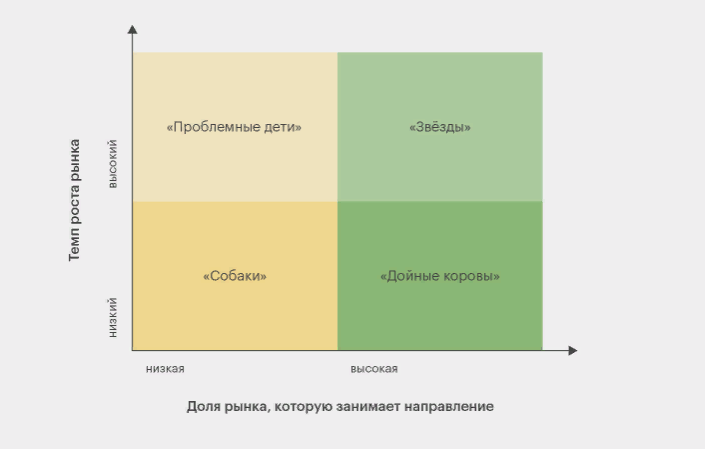


Секторы матрицы БКГ совпадают с этапами жизненного цикла продукта.

Каждое направление однажды станет либо дойной коровой, либо собакой.

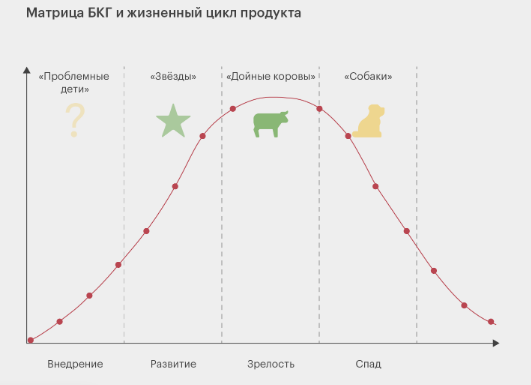

#### **5.5.1. BCG_анализ январь-май 2019 г.(с учетом моделей Volkswagen)**

In [44]:
# Построим матрицу BCG для моделей, продаваемых АЦ Меркур Авто - выручка от продажи
bcg_df = df_mercur_auto[df_mercur_auto['год_месяц']<'2019-06'].groupby(['модель', 'бренд', 'год_месяц'])['общая_стоимость_заказа(usd)'].sum().reset_index()
bcg_df['доля_модели_в_общей_выручке_%'] = bcg_df.groupby('модель')['общая_стоимость_заказа(usd)'].transform('sum') / bcg_df['общая_стоимость_заказа(usd)'].sum() * 100
bcg_df['темп_роста_выручки_модели_%'] = bcg_df.groupby('модель')['общая_стоимость_заказа(usd)'].transform('last') / bcg_df.sort_values(by='год_месяц').groupby('модель')['общая_стоимость_заказа(usd)'].transform('first') * 100
bcg_df['общая_выручка_модели(usd)'] = bcg_df.groupby('модель')['общая_стоимость_заказа(usd)'].transform('sum')
bcg_df.head()

,модель,бренд,год_месяц,общая_стоимость_заказа(usd),доля_модели_в_общей_выручке_%,темп_роста_выручки_модели_%,общая_выручка_модели(usd)
0,911 Carrera S,Porsche,2019-03,"162,576.08",1.08,100.00,"162,576.08"
1,A3,Audi,2019-05,"28,115.00",0.19,100.00,"28,115.00"
2,A4,Audi,2019-04,"32,000.00",0.21,100.00,"32,000.00"
3,A6,Audi,2019-02,"42,608.25",0.83,193.26,"124,952.25"
4,A6,Audi,2019-05,"82,344.00",0.83,193.26,"124,952.25"


In [45]:
# Визуализируем матрицу BCG с помощью графика scatter
# цвет кругов в зависимости от квадранта
color_scheme = ["#0492C2"] * 11
color_scheme[5] = '#028A0F'
color_scheme[0], color_scheme[2] = '#FCAE1E', '#FCAE1E'

fig = px.scatter(bcg_df[bcg_df['доля_модели_в_общей_выручке_%'] > 2], # почистим от совсем слабых моделей
                 x="доля_модели_в_общей_выручке_%", y="темп_роста_выручки_модели_%",
                 size="общая_выручка_модели(usd)", color="модель",
                 size_max=85,
                 text='модель',
                 color_discrete_sequence=color_scheme,
                 title="BCG матрица АЦ Меркур Авто",
                 width=1000, height=600)

# добавим квадранты матрицы
fig.add_shape(type='line', x0=0, y0=300, x1=60, y1=300, line=dict(color='black', dash='dash', width=3))
fig.add_shape(type='line', x0=30, y0=0, x1=30, y1=700, line=dict(color='black', dash='dash', width=3))

# добавим подписи квадртантов
fig.add_annotation(x=27, y=280, text="<b>Собаки</b>", showarrow=False)
fig.add_annotation(x=24, y=680, text="<b>Проблемные дети</b>", showarrow=False)
fig.add_annotation(x=56, y=680, text="<b>Звезды</b>", showarrow=False)
fig.add_annotation(x=55, y=280, text="<b>Дойные коровы</b>", showarrow=False)

# уберем легенду
fig.update_layout(showlegend=False, xaxis_title="Доля выручки от продажи модели в общей выручке АЦ Меркур Авто, %", yaxis_title="Темп роста выручки от продажи модели, %")

fig.show()

In [46]:
# Построим матрицу BCG для моделей, продаваемых АЦ Меркур Авто - количество проданные единиц
bcg_df_count = df_mercur_auto[df_mercur_auto['год_месяц']<'2019-06'].groupby(['модель', 'бренд', 'год_месяц'])['количество'].sum().reset_index()
bcg_df_count['доля_модели_в_общем_количестве_%'] = bcg_df_count.groupby('модель')['количество'].transform('sum') / bcg_df_count['количество'].sum() * 100
bcg_df_count['темп_роста_количества_продаж_модели_%'] = bcg_df_count.groupby('модель')['количество'].transform('last') / bcg_df_count.sort_values(by='год_месяц').groupby('модель')['количество'].transform('first') * 100
bcg_df_count['общее_количество_по_модели(ед)'] = bcg_df_count.groupby('модель')['количество'].transform('sum')
bcg_df_count.head()

,модель,бренд,год_месяц,количество,доля_модели_в_общем_количестве_%,темп_роста_количества_продаж_модели_%,общее_количество_по_модели(ед)
0,911 Carrera S,Porsche,2019-03,1,0.17,100.00,1
1,A3,Audi,2019-05,1,0.17,100.00,1
2,A4,Audi,2019-04,1,0.17,100.00,1
3,A6,Audi,2019-02,1,0.33,100.00,2
4,A6,Audi,2019-05,1,0.33,100.00,2


In [47]:
# Визуализируем матрицу BCG с помощью графика scatter - еоличество единиц проданных а/м данной марки
# цвет кругов в зависимости от квадранта
color_scheme = ["#0492C2"] * 11
color_scheme[5] = '#028A0F'
color_scheme[0], color_scheme[2] = '#FCAE1E', '#FCAE1E'

fig = px.scatter(bcg_df_count[bcg_df_count['доля_модели_в_общем_количестве_%'] > 1.0], # почистим от совсем слабых моделей
                 x="доля_модели_в_общем_количестве_%", y="темп_роста_количества_продаж_модели_%",
                 size="общее_количество_по_модели(ед)", color="модель",
                 size_max=85,
                 text='модель',
                 color_discrete_sequence=color_scheme,
                 title="BCG матрица АЦ Меркур Авто",
                 width=1000, height=600)

# добавим квадранты матрицы
fig.add_shape(type='line', x0=0, y0=300, x1=90, y1=300, line=dict(color='black', dash='dash', width=3))
fig.add_shape(type='line', x0=45, y0=0, x1=45, y1=850, line=dict(color='black', dash='dash', width=3))

# добавим подписи квадртантов
fig.add_annotation(x=42, y=280, text="<b>Собаки</b>", showarrow=False)
fig.add_annotation(x=38, y=815, text="<b>Проблемные дети</b>", showarrow=False)
fig.add_annotation(x=88, y=815, text="<b>Звезды</b>", showarrow=False)
fig.add_annotation(x=85, y=280, text="<b>Дойные коровы</b>", showarrow=False)

# уберем легенду
fig.update_layout(showlegend=False, xaxis_title="Доля выручки от продажи модели в общей выручке АЦ Меркур Авто, %", yaxis_title="Темп роста выручки от продажи модели, %")

fig.show()

#### **5.5.3. BCG_анализ (без учета моделей Volkswagen)**

In [48]:
# Построим матрицу BCG для моделей, продаваемых АЦ Меркур Авто
bcg_df_2 = df_mercur_auto[df_mercur_auto['бренд']!='Volkswagen'].groupby(['модель', 'бренд', 'год_месяц'])['общая_стоимость_заказа(usd)'].sum().reset_index()
bcg_df_2['доля_модели_в_общей_выручке_%'] = bcg_df_2.groupby('модель')['общая_стоимость_заказа(usd)'].transform('sum') / bcg_df_2['общая_стоимость_заказа(usd)'].sum() * 100
bcg_df_2['темп_роста_выручки_модели_%'] = bcg_df_2.groupby('модель')['общая_стоимость_заказа(usd)'].transform('last') / bcg_df_2.sort_values(by='год_месяц').groupby('модель')['общая_стоимость_заказа(usd)'].transform('first') * 100
bcg_df_2['общая_выручка_модели(usd)'] = bcg_df_2.groupby('модель')['общая_стоимость_заказа(usd)'].transform('sum')
bcg_df_2.head()

,модель,бренд,год_месяц,общая_стоимость_заказа(usd),доля_модели_в_общей_выручке_%,темп_роста_выручки_модели_%,общая_выручка_модели(usd)
0,911 Carrera S,Porsche,2019-03,"162,576.08",1.77,100.00,"162,576.08"
1,A3,Audi,2019-05,"28,115.00",0.66,114.70,"60,361.99"
2,A3,Audi,2019-08,"32,246.99",0.66,114.70,"60,361.99"
3,A4,Audi,2019-04,"32,000.00",1.05,199.56,"95,858.00"
4,A4,Audi,2019-07,"63,858.00",1.05,199.56,"95,858.00"


In [49]:
# Визуализируем матрицу BCG с помощью графика scatter
# цвет кругов в зависимости от квадранта
color_scheme = ["#0492C2"] * 11
color_scheme[5] = '#028A0F'
color_scheme[0], color_scheme[2] = '#FCAE1E', '#FCAE1E'

fig = px.scatter(bcg_df_2[bcg_df_2['доля_модели_в_общей_выручке_%'] > 1.2], # почистим от совсем слабых моделей
                 x="доля_модели_в_общей_выручке_%", y="темп_роста_выручки_модели_%",
                 size="общая_выручка_модели(usd)", color="модель",
                 size_max=85,
                 text='модель',
                 color_discrete_sequence=color_scheme,
                 title="BCG матрица АЦ Меркур Авто",
                 width=1000, height=600)

# добавим квадранты матрицы
fig.add_shape(type='line', x0=0, y0=225, x1=40, y1=225, line=dict(color='black', dash='dash', width=3))
fig.add_shape(type='line', x0=20, y0=0, x1=20, y1=500, line=dict(color='black', dash='dash', width=3))

# добавим подписи квадртантов
fig.add_annotation(x=18.5, y=200, text="<b>Собаки</b>", showarrow=False)
fig.add_annotation(x=16.5, y=490, text="<b>Проблемные дети</b>", showarrow=False)
fig.add_annotation(x=38.5, y=490, text="<b>Звезды</b>", showarrow=False)
fig.add_annotation(x=37, y=200, text="<b>Дойные коровы</b>", showarrow=False)

# уберем легенду
fig.update_layout(showlegend=False, xaxis_title="Доля выручки от продажи модели в общей выручке АЦ Меркур Авто, %", yaxis_title="Темп роста выручки от продажи модели, %")

fig.show()

#### **5.5.3. BCG_анализ за июнь-сентябрь 2019 г.**

In [50]:
# Построим матрицу BCG для моделей, продаваемых АЦ Меркур Авто, за июнь-сентябрь 2019 г.
bcg_df_3 = df_mercur_auto[df_mercur_auto['год_месяц']>='2019-06'].groupby(['модель', 'бренд', 'год_месяц'])['общая_стоимость_заказа(usd)'].sum().reset_index()
bcg_df_3['доля_модели_в_общей_выручке_%'] = bcg_df_3.groupby('модель')['общая_стоимость_заказа(usd)'].transform('sum') / bcg_df_3['общая_стоимость_заказа(usd)'].sum() * 100
bcg_df_3['темп_роста_выручки_модели_%'] = bcg_df_3.groupby('модель')['общая_стоимость_заказа(usd)'].transform('last') / bcg_df_3.sort_values(by='год_месяц').groupby('модель')['общая_стоимость_заказа(usd)'].transform('first') * 100
bcg_df_3['общая_выручка_модели(usd)'] = bcg_df_3.groupby('модель')['общая_стоимость_заказа(usd)'].transform('sum')
bcg_df_3.head()

,модель,бренд,год_месяц,общая_стоимость_заказа(usd),доля_модели_в_общей_выручке_%,темп_роста_выручки_модели_%,общая_выручка_модели(usd)
0,A3,Audi,2019-08,"32,246.99",0.74,100.00,"32,246.99"
1,A4,Audi,2019-07,"63,858.00",1.46,100.00,"63,858.00"
2,A6,Audi,2019-06,"222,354.00",11.06,79.18,"482,740.26"
3,A6,Audi,2019-07,"84,329.00",11.06,79.18,"482,740.26"
4,A6,Audi,2019-08,"176,057.26",11.06,79.18,"482,740.26"


In [51]:
# Визуализируем матрицу BCG с помощью графика scatter
# цвет кругов в зависимости от квадранта
color_scheme = ["#0492C2"] * 11
color_scheme[5] = '#028A0F'
color_scheme[0], color_scheme[2] = '#FCAE1E', '#FCAE1E'

fig = px.scatter(bcg_df_3, # почистим от совсем слабых моделей
                 x="доля_модели_в_общей_выручке_%", y="темп_роста_выручки_модели_%",
                 size="общая_выручка_модели(usd)", color="модель",
                 size_max=85,
                 text='модель',
                 color_discrete_sequence=color_scheme,
                 title="BCG матрица АЦ Меркур Авто",
                 width=1000, height=600)

# добавим квадранты матрицы
fig.add_shape(type='line', x0=0, y0=225, x1=40, y1=225, line=dict(color='black', dash='dash', width=3))
fig.add_shape(type='line', x0=20, y0=0, x1=20, y1=600, line=dict(color='black', dash='dash', width=3))

# добавим подписи квадртантов
fig.add_annotation(x=18.5, y=200, text="<b>Собаки</b>", showarrow=False)
fig.add_annotation(x=16.5, y=580, text="<b>Проблемные дети</b>", showarrow=False)
fig.add_annotation(x=38.5, y=580, text="<b>Звезды</b>", showarrow=False)
fig.add_annotation(x=37, y=200, text="<b>Дойные коровы</b>", showarrow=False)

# уберем легенду
fig.update_layout(showlegend=False, xaxis_title="Доля выручки от продажи модели в общей выручке АЦ Меркур Авто, %", yaxis_title="Темп роста выручки от продажи модели, %")

fig.show()

#### **5.5.5. Промежуточный вывод**

_____________
____________
BCG анализ АЦ Меркур Авто затруднен тем, что с июня 2019 г. автоцент перестал быть дилером Volkswagen.

По причине этого события я построила несколько моделей.

Результаты BCG_анализа АЦ Меркур Авто:
- до 01.06.2019 г. у компании было:
       - 0 - звезд,
       - 1 - корова (Polo Volkswagen),
       - 1 - проблемные дети,
       - остальные - собаки
- после 01.06.2019 г. ситуация изменилась:
       - 1 звезда - Cayenne,
       - 1 корова - Q8,
       - 1 проблемный ребенок - Macan,
       - остальные собаки.

К сожалению, период анализа очень короткий, компания не успела перестроиться после утраты дилерства Volkswagen.

На данном этапе перспективных моделей, способных заменить Polo Volkswagen у компании нет.

Нужно либо менять сегмент, либо искать замену по классу а/м у других брендов.

### **5.6. Общий вывод по разделу**

- АЦ Меркур Авто - официальный дилер брендов Volkswagen, Audi, Porsche в Казахстане;
- в июне 2019 г. АЦ Меркур Авто потерял статус дилера бренда Volkswagen (статус перешел - Volkswagen Group Rus);
- по состоянию на 01.10.2019 г. АЦ Меркур Авто продает а/м в 2-х регионах: г.Нур-Султан и г.Алматы (в начале года было 6 регионов);
- после потери дилерства Volkswagen АЦ Меркур Авто продает на рынке в основном а/м классов: E_класс, F_класс, Полноразмерные_SUV;
- основной регион продаж - г.Алматы, в г. Нур-Султан доля рынка существенно ниже.




**Возможные направления развития:**
- увеличение доли на рынке а/м  E_класса, F_класса, Полноразмерных_SUV, особенно в г. Нур-Султан;
- поиск нового дилерства в сегменте легковых а/м В-класса и внедорожников класса Среднеразмерные SUV.

